# 10-fold cross validation, precomputed activations, frozen layers, retraining output layer

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
torch.cuda.set_device(0)
PATH = "data/drugs/pics/"
sz = 224
arch = resnext101_64
bs = 150

## get_data f(x)

In [4]:
def get_data(sz, bs, val_idxs, label_csv): # sz: image size, bs: batch size
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv,
                                       val_idxs=val_idxs, suffix='.png', tfms=tfms, bs=bs)
    return data if sz > 300 else data.resize(340, 'tmp') # Reading the jpgs and resizing is slow for big images, so resizing them all to 340 first saves time


## 3 class

In [5]:
def k_fold_cross_loop1(k, epochs, bs, label_csv, n, name):
    validation_accuracy = []
    for reps in range(k):
        val_idxs = get_cv_idxs(n, seed=random.sample(range(1000), 1)) # random 20% data for validation set
        data = get_data(sz, bs, val_idxs, label_csv)
        learn = ConvLearner.pretrained(arch, data, precompute=True)
        val_loss, val_acc = learn.fit(1e-2, epochs)
        validation_accuracy.append(val_acc)
        learn.save(str(reps)+name)
    return validation_accuracy, learn, data

In [6]:
label_csv = f'{PATH}3labels.csv'
n = len(list(open(label_csv))) - 1 # header is not counted (-1)
#v_a3a, learn3a, data3a = k_fold_cross_loop1(5,1000,5000, label_csv, n)
v_a3b, learn3b, data3b = k_fold_cross_loop1(10,50,200, label_csv, n, '_3cls_50ep_bs200.model')
#data = get_data(sz, bs, val_idxs, label_csv)


100%|██████████| 6/6 [00:10<00:00,  1.52s/it]


epoch      trn_loss   val_loss   accuracy                 
    0      1.147651   0.866048   0.60186   
    1      0.980794   0.786867   0.656744                 
    2      0.900492   0.757581   0.667907                  
    3      0.853009   0.73655    0.67814                  
    4      0.810735   0.725      0.691163                 
    5      0.77333    0.719318   0.692093                  
    6      0.742644   0.69289    0.700465                 
    7      0.714387   0.705025   0.695814                 
    8      0.686838   0.682387   0.712558                 
    9      0.673597   0.674052   0.709767                 
    10     0.652039   0.688125   0.708837                 
    11     0.637073   0.668706   0.72186                  
    12     0.623622   0.668694   0.724651                 
    13     0.608688   0.65533    0.727442                 
    14     0.591284   0.649036   0.737674                 
    15     0.572887   0.643277   0.741395                 
    16    

epoch      trn_loss   val_loss   accuracy                 
    0      1.164349   0.87535    0.585116  
    1      1.00365    0.829637   0.635349                
    2      0.916338   0.792221   0.649302                  
    3      0.857915   0.757476   0.675349                 
    4      0.815528   0.755274   0.676279                 
    5      0.78174    0.749289   0.699535                  
    6      0.757373   0.719067   0.693023                 
    7      0.725405   0.706209   0.72                     
    8      0.696227   0.715389   0.709767                 
    9      0.676887   0.701996   0.72                     
    10     0.652421   0.70512    0.716279                  
    11     0.632862   0.702664   0.715349                 
    12     0.622048   0.705275   0.713488                 
    13     0.606853   0.703673   0.72                      
    14     0.588174   0.688554   0.728372                  
    15     0.57296    0.673475   0.729302                  
    16 

epoch      trn_loss   val_loss   accuracy                 
    0      1.149595   0.865205   0.602791  
    1      0.990818   0.793165   0.653953                
    2      0.902544   0.769692   0.673488                 
    3      0.845683   0.742622   0.685581                 
    4      0.805528   0.72672    0.702326                 
    5      0.76204    0.726376   0.701395                  
    6      0.733492   0.708326   0.708837                  
    7      0.711295   0.72872    0.701395                 
    8      0.68751    0.691699   0.715349                  
    9      0.668779   0.707458   0.696744                  
    10     0.646562   0.687439   0.717209                  
    11     0.621426   0.678348   0.715349                 
    12     0.606564   0.675218   0.716279                 
    13     0.590439   0.683476   0.71814                  
    14     0.574445   0.674595   0.71907                  
    15     0.562384   0.697124   0.72                     
    16  

epoch      trn_loss   val_loss   accuracy                
    0      1.110966   0.852142   0.629767  
    1      0.975115   0.799603   0.658605                
    2      0.894527   0.776782   0.658605                 
    3      0.843562   0.744346   0.693023                 
    4      0.800159   0.736429   0.688372                 
    5      0.76613    0.721681   0.698605                  
    6      0.737976   0.704502   0.72093                   
    7      0.714692   0.705858   0.712558                 
    8      0.69359    0.703786   0.704186                 
    9      0.670291   0.678609   0.723721                 
    10     0.652461   0.676847   0.71907                  
    11     0.637029   0.676601   0.72093                  
    12     0.620405   0.6744     0.727442                  
    13     0.61085    0.689684   0.71814                   
    14     0.594124   0.686995   0.71814                   
    15     0.57599    0.677824   0.72186                   
    16  

epoch      trn_loss   val_loss   accuracy                
    0      1.128153   0.884192   0.59814   
    1      0.979996   0.828358   0.626977                
    2      0.905596   0.803115   0.637209                 
    3      0.854783   0.773659   0.653023                  
    4      0.807552   0.749834   0.671628                  
    5      0.774055   0.739423   0.67907                   
    6      0.746356   0.735023   0.685581                  
    7      0.722634   0.719073   0.699535                  
    8      0.700253   0.726877   0.693953                  
    9      0.678369   0.714034   0.687442                 
    10     0.659472   0.700085   0.704186                 
    11     0.640552   0.709057   0.713488                  
    12     0.621284   0.704148   0.709767                
    13     0.608331   0.69286    0.709767                 
    14     0.591756   0.689493   0.712558                 
    15     0.578021   0.693023   0.72093                  
    16  

epoch      trn_loss   val_loss   accuracy                
    0      1.110747   0.863336   0.619535  
    1      0.980947   0.808822   0.625116                
    2      0.908299   0.774815   0.668837                 
    3      0.850837   0.748257   0.67814                   
    4      0.811861   0.728313   0.684651                 
    5      0.776768   0.72826    0.704186                 
    6      0.750455   0.714796   0.685581                 
    7      0.718326   0.705275   0.695814                 
    8      0.693      0.698702   0.709767                 
    9      0.666245   0.683606   0.711628                  
    10     0.650044   0.680164   0.72                      
    11     0.6368     0.678323   0.71814                  
    12     0.62028    0.678477   0.712558                  
    13     0.601102   0.673705   0.722791                 
    14     0.585525   0.679956   0.72186                  
    15     0.570928   0.67649    0.728372                 
    16    

epoch      trn_loss   val_loss   accuracy                
    0      1.166848   0.904962   0.589767  
    1      1.002223   0.820539   0.626047                
    2      0.915921   0.7867     0.647442                 
    3      0.858174   0.766667   0.658605                 
    4      0.8153     0.750378   0.666977                  
    5      0.774037   0.742868   0.693953                  
    6      0.746152   0.72656    0.692093                  
    7      0.722272   0.727417   0.692093                  
    8      0.696467   0.710629   0.705116                  
    9      0.67287    0.720365   0.700465                  
    10     0.654349   0.7097     0.708837                  
    11     0.640219   0.711648   0.716279                  
    12     0.622631   0.708335   0.72                     
    13     0.602778   0.698924   0.72093                   
    14     0.589      0.713764   0.707907                  
    15     0.575715   0.707754   0.712558                 
    

epoch      trn_loss   val_loss   accuracy                 
    0      1.118368   0.867478   0.614884  
    1      0.98326    0.807748   0.635349                  
    2      0.903691   0.775521   0.657674                  
    3      0.851595   0.755232   0.677209                 
    4      0.809331   0.74123    0.682791                  
    5      0.78279    0.728667   0.692093                  
    6      0.750651   0.722056   0.699535                  
    7      0.727429   0.716123   0.696744                 
    8      0.704408   0.713463   0.702326                  
    9      0.681308   0.679976   0.717209                  
    10     0.66112    0.67889    0.715349                  
    11     0.634733   0.682498   0.72                      
    12     0.61644    0.673149   0.725581                  
    13     0.60058    0.675514   0.717209                  
    14     0.585789   0.687546   0.71907                   
    15     0.572138   0.689406   0.72093                   

epoch      trn_loss   val_loss   accuracy                 
    0      1.147406   0.877054   0.602791  
    1      0.992846   0.798298   0.642791                 
    2      0.909674   0.774976   0.661395                  
    3      0.858361   0.750366   0.676279                  
    4      0.814831   0.738538   0.688372                  
    5      0.774611   0.723781   0.698605                  
    6      0.745764   0.712751   0.694884                 
    7      0.723653   0.710177   0.704186                  
    8      0.692661   0.708932   0.711628                  
    9      0.672047   0.69015    0.712558                  
    10     0.64724    0.701473   0.702326                  
    11     0.633024   0.714175   0.703256                  
    12     0.614586   0.681428   0.712558                  
    13     0.599261   0.686683   0.715349                  
    14     0.581669   0.67393    0.725581                  
    15     0.56007    0.686007   0.725581                  

epoch      trn_loss   val_loss   accuracy                 
    0      1.15605    0.889778   0.60093   
    1      0.998249   0.82276    0.634419                 
    2      0.911545   0.799788   0.659535                  
    3      0.855244   0.772204   0.68093                  
    4      0.811558   0.769622   0.672558                  
    5      0.772748   0.745583   0.686512                  
    6      0.742147   0.737957   0.689302                  
    7      0.719735   0.719971   0.700465                  
    8      0.696054   0.717373   0.702326                  
    9      0.678669   0.734774   0.702326                  
    10     0.653888   0.725755   0.699535                  
    11     0.632104   0.712207   0.706977                  
    12     0.611523   0.729244   0.701395                  
    13     0.597455   0.706418   0.711628                  
    14     0.581661   0.734855   0.702326                  
    15     0.567685   0.706924   0.722791                  

[0.745116276796474, 0.7293023162109907, 0.7469767401384753, 0.7330232650734657, 0.763720921305723, 0.7581395312797191, 0.7479069870571757, 0.739534875681234, 0.7432558176129364, 0.7404651225999345]
mean=0.7447441853756127
stdev.=0.00989025624580606
[[0.57 0.2  0.22]                            
 [0.04 0.86 0.1 ]
 [0.02 0.12 0.86]]


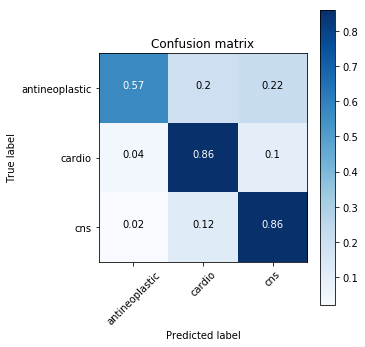

In [13]:
print(v_a3b)
print('mean='+str(np.mean(v_a3b)))
print('stdev.='+str(np.std(v_a3b)))
plt.rcParams['figure.figsize'] = [5, 5]
log_preds,y = learn3b.TTA()
probs = np.mean(np.exp(log_preds),0)

preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
adj = cm.transpose()/cm.sum(axis=1)
adj = adj.round(2)
plot_confusion_matrix(adj.transpose(), data3b.classes)

### 5 class, pretrained, 10-fold cross validation

In [7]:
label_csv = f'{PATH}5labels.csv'
n = len(list(open(label_csv))) - 1
#v_a5, learn5 = k_fold_cross_loop1(10,1000,5000, label_csv, n)
v_a5, learn5, data5 = k_fold_cross_loop1(10,80,200, label_csv, n, '_5cls_80ep_bs200.model')


100%|██████████| 10/10 [00:16<00:00,  1.67s/it]


epoch      trn_loss   val_loss   accuracy                 
    0      1.511979   1.200156   0.506925  
    1      1.337515   1.118615   0.554571                 
    2      1.241134   1.087162   0.559003                 
    3      1.166742   1.05339    0.577285                 
    4      1.109561   1.027056   0.583379                 
    5      1.060262   1.012984   0.58615                  
    6      1.03351    0.997286   0.595014                 
    7      0.999362   0.981765   0.603324                 
    8      0.973912   0.96352    0.616066                  
    9      0.945263   0.952296   0.616621                  
    10     0.923567   0.950481   0.618837                  
    11     0.9077     0.936455   0.624931                  
    12     0.884874   0.931237   0.628809                  
    13     0.869624   0.936556   0.613296                  
    14     0.847693   0.944438   0.627147                  
    15     0.836962   0.927291   0.612188                  
    

   135     0.32797    1.072696   0.641551                  
   136     0.327388   1.080232   0.648199                  
   137     0.329757   1.064766   0.643213                  
   138     0.329546   1.093966   0.647645                  
   139     0.328904   1.085294   0.642659                  
   140     0.332493   1.076265   0.646537                  
   141     0.336132   1.068816   0.647091                  
   142     0.335758   1.062803   0.643213                  
   143     0.328748   1.070072   0.642659                  
   144     0.323663   1.065801   0.642659                  
   145     0.326023   1.085251   0.637673                  
   146     0.334078   1.081212   0.642105                  
   147     0.326686   1.076816   0.654294                  
   148     0.337063   1.056275   0.65928                   
   149     0.33093    1.071662   0.647091                  
   150     0.32449    1.07998    0.649307                  
   151     0.308264   1.07824    0.64542

   271     0.262021   1.185827   0.644875                  
   272     0.256389   1.160465   0.655402                  
   273     0.257255   1.163182   0.655402                  
   274     0.254061   1.165285   0.657064                  
   275     0.24831    1.164934   0.652632                  
   276     0.25069    1.166976   0.65374                   
   277     0.247119   1.171698   0.653186                  
   278     0.25218    1.191191   0.65097                   
   279     0.251372   1.159347   0.649307                  
   280     0.256667   1.176209   0.650416                  
   281     0.259997   1.163916   0.660388                  
   282     0.266277   1.170312   0.652632                  
   283     0.266359   1.168105   0.654294                  
   284     0.266038   1.1604     0.654294                  
   285     0.258591   1.172127   0.651524                  
   286     0.259632   1.176767   0.655402                  
   287     0.256961   1.175665   0.64819

   407     0.245668   1.229271   0.649307                  
   408     0.24047    1.21933    0.652078                  
   409     0.236351   1.2231     0.643767                  
   410     0.233614   1.204693   0.645429                  
   411     0.234835   1.214715   0.648199                  
   412     0.230294   1.22677    0.645983                  
   413     0.229692   1.234987   0.644875                  
   414     0.225744   1.2256     0.65097                   
   415     0.221102   1.2487     0.649861                  
   416     0.221088   1.233979   0.647645                  
   417     0.232      1.246305   0.650416                  
   418     0.229652   1.233086   0.650416                  
   419     0.226828   1.262667   0.647645                  
   420     0.232808   1.243948   0.65374                   
   421     0.230442   1.255703   0.65097                   
   422     0.228516   1.237898   0.648753                  
   423     0.234711   1.244409   0.65097

   543     0.219311   1.308388   0.638781                  
   544     0.227943   1.303394   0.645429                  
   545     0.226927   1.313996   0.642105                  
   546     0.218865   1.30072    0.645429                  
   547     0.219304   1.285772   0.647091                  
   548     0.218701   1.297664   0.648753                  
   549     0.223207   1.317357   0.645429                  
   550     0.217396   1.280404   0.652632                  
   551     0.222319   1.314888   0.654294                  
   552     0.230333   1.282356   0.653186                  
   553     0.225123   1.291505   0.65097                   
   554     0.233024   1.281344   0.652078                  
   555     0.232871   1.286037   0.649307                  
   556     0.23031    1.295367   0.643767                 
   557     0.22114    1.278586   0.642659                  
   558     0.219134   1.268713   0.640443                  
   559     0.228132   1.269747   0.641551

   679     0.236389   1.310779   0.658726                  
   680     0.242121   1.332226   0.655402                  
   681     0.231731   1.310458   0.650416                  
   682     0.229095   1.306551   0.651524                  
   683     0.217848   1.300791   0.647091                  
   684     0.220189   1.305988   0.652078                  
   685     0.21797    1.305105   0.657618                  
   686     0.21325    1.291371   0.653186                  
   687     0.211437   1.308969   0.65097                   
   688     0.213091   1.309668   0.65651                   
   689     0.215667   1.3102     0.659834                  
   690     0.217083   1.322141   0.65651                   
   691     0.21892    1.316658   0.658172                  
   692     0.214619   1.302042   0.657618                  
   693     0.213621   1.316343   0.659834                  
   694     0.224306   1.336194   0.655402                  
   695     0.212758   1.313468   0.65484

   815     0.205089   1.36829    0.647645                  
   816     0.201295   1.353719   0.651524                  
   817     0.195624   1.370401   0.651524                  
   818     0.200119   1.369787   0.651524                  
   819     0.199958   1.359525   0.652078                  
   820     0.197864   1.36871    0.649307                  
   821     0.200397   1.384134   0.651524                  
   822     0.199539   1.369911   0.652078                  
   823     0.208461   1.361489   0.655956                  
   824     0.205334   1.36068    0.652078                  
   825     0.202327   1.360548   0.650416                  
   826     0.197703   1.364103   0.65374                   
   827     0.201577   1.361666   0.65097                   
   828     0.201468   1.350023   0.659834                  
   829     0.208424   1.352542   0.661496                  
   830     0.204628   1.350188   0.652078                  
   831     0.203241   1.356624   0.65651

   951     0.207578   1.38039    0.657064                  
   952     0.207993   1.377984   0.655402                  
   953     0.222838   1.381229   0.661496                  
   954     0.217401   1.368476   0.66205                   
   955     0.209194   1.371292   0.660388                  
   956     0.210797   1.340888   0.653186                  
   957     0.21675    1.347255   0.658726                  
   958     0.20934    1.330019   0.657618                  
   959     0.208913   1.327131   0.658726                  
   960     0.20612    1.369295   0.654294                  
   961     0.215183   1.374026   0.652078                  
   962     0.204729   1.348579   0.654848                  
   963     0.201623   1.350767   0.65374                   
   964     0.206524   1.361597   0.65374                   
   965     0.199626   1.384662   0.658172                  
   966     0.199804   1.357618   0.653186                  
   967     0.200051   1.362206   0.65706

epoch      trn_loss   val_loss   accuracy                 
    0      1.520518   1.217796   0.518006  
    1      1.315146   1.145695   0.545152                 
    2      1.223527   1.108952   0.566205                 
    3      1.152936   1.074985   0.568975                 
    4      1.100585   1.054636   0.590582                 
    5      1.070609   1.039869   0.595568                 
    6      1.041528   1.023859   0.587812                 
    7      1.003535   1.013009   0.58892                  
    8      0.965121   1.015275   0.609972                  
    9      0.950032   1.008185   0.59723                   
    10     0.924453   1.016837   0.6                       
    11     0.916453   0.987369   0.606648                 
    12     0.901782   1.00213    0.604432                  
    13     0.883622   0.98638    0.619945                  
    14     0.864776   0.975841   0.617175                  
    15     0.835934   0.976844   0.615512                  
    1

   135     0.343308   1.16916    0.632133                  
   136     0.33303    1.171682   0.640997                  
   137     0.341961   1.185856   0.633795                  
   138     0.33156    1.175328   0.636011                  
   139     0.332183   1.179077   0.645429                  
   140     0.334265   1.178964   0.639889                  
   141     0.32479    1.189576   0.636565                  
   142     0.330771   1.180802   0.637673                  
   143     0.333737   1.175262   0.637119                  
   144     0.334317   1.169998   0.634349                  
   145     0.339244   1.180409   0.633795                  
   146     0.350325   1.197709   0.639335                  
   147     0.339956   1.175655   0.640997                  
   148     0.339045   1.192988   0.638781                  
   149     0.336809   1.184379   0.631579                  
   150     0.326751   1.180726   0.640443                  
   151     0.32378    1.183966   0.64764

   271     0.25991    1.304153   0.636565                  
   272     0.266377   1.299585   0.644875                  
   273     0.260409   1.306279   0.649861                  
   274     0.266337   1.308301   0.644321                  
   275     0.260226   1.312267   0.643213                  
   276     0.262772   1.31025    0.642105                  
   277     0.259865   1.299597   0.639335                  
   278     0.256489   1.2949     0.644321                  
   279     0.264084   1.317474   0.648199                  
   280     0.26122    1.31656    0.643213                  
   281     0.259057   1.315565   0.644321                  
   282     0.261841   1.312675   0.644321                  
   283     0.263245   1.295053   0.644321                  
   284     0.260704   1.308288   0.638781                  
   285     0.257245   1.312825   0.642659                  
   286     0.256176   1.314909   0.634903                  
   287     0.255703   1.33162    0.64210

   407     0.233189   1.395607   0.631579                  
   408     0.229301   1.379828   0.638781                  
   409     0.223804   1.390272   0.636011                  
   410     0.224547   1.389736   0.633241                  
   411     0.222568   1.401643   0.637673                  
   412     0.220451   1.407216   0.640997                  
   413     0.226406   1.387204   0.638781                  
   414     0.224068   1.394199   0.636011                  
   415     0.224795   1.385541   0.639889                  
   416     0.231548   1.402026   0.638227                  
   417     0.23478    1.390353   0.640443                  
   418     0.237018   1.408969   0.637673                  
   419     0.237737   1.404435   0.644875                  
   420     0.237698   1.414324   0.638781                  
   421     0.232621   1.420885   0.642659                  
   422     0.239529   1.409942   0.637673                 
   423     0.241462   1.426558   0.636565

   543     0.217987   1.435832   0.640443                  
   544     0.227679   1.440805   0.637119                  
   545     0.230718   1.423847   0.642659                  
   546     0.221331   1.435451   0.640997                  
   547     0.2217     1.445567   0.636565                  
   548     0.221774   1.446788   0.636011                  
   549     0.221071   1.436981   0.637673                  
   550     0.220928   1.454389   0.633241                  
   551     0.224186   1.467041   0.631025                  
   552     0.22906    1.431285   0.632687                  
   553     0.228766   1.436011   0.633795                  
   554     0.222662   1.424368   0.639335                  
   555     0.221864   1.422534   0.633241                  
   556     0.221071   1.437582   0.636565                  
   557     0.214684   1.436365   0.637673                  
   558     0.214022   1.435305   0.640997                  
   559     0.221074   1.43212    0.63933

   679     0.228071   1.444102   0.639889                  
   680     0.242623   1.453266   0.635457                  
   681     0.233424   1.458149   0.629917                  
   682     0.229666   1.45889    0.636011                  
   683     0.221137   1.470626   0.638781                  
   684     0.217716   1.463472   0.634349                  
   685     0.221508   1.482972   0.628255                  
   686     0.227232   1.471655   0.638781                  
   687     0.22104    1.474785   0.633241                  
   688     0.216153   1.485647   0.634903                  
   689     0.210253   1.483907   0.626039                  
   690     0.217725   1.500796   0.636565                  
   691     0.220569   1.489206   0.631579                  
   692     0.21638    1.500557   0.629363                  
   693     0.217943   1.505723   0.628255                  
   694     0.209745   1.489191   0.633241                  
   695     0.21057    1.519298   0.62991

   815     0.220251   1.475319   0.636565                  
   816     0.216285   1.478773   0.634349                  
   817     0.210057   1.465071   0.639335                  
   818     0.207229   1.468888   0.637673                  
   819     0.209897   1.488675   0.636565                  
   820     0.210888   1.487189   0.634349                  
   821     0.21551    1.491985   0.637119                  
   822     0.211341   1.48504    0.636565                  
   823     0.223109   1.491457   0.636011                  
   824     0.217088   1.494494   0.632687                  
   825     0.214206   1.493376   0.629363                  
   826     0.212058   1.50393    0.636565                  
   827     0.215171   1.492718   0.637119                  
   828     0.213549   1.491818   0.633795                  
   829     0.212763   1.477625   0.628809                  
   830     0.222941   1.459196   0.636565                  
   831     0.214028   1.473663   0.64044

   951     0.20751    1.529245   0.639889                  
   952     0.203999   1.555877   0.638781                  
   953     0.214111   1.522996   0.640443                  
   954     0.215614   1.523115   0.636565                  
   955     0.211377   1.523436   0.644321                  
   956     0.206929   1.523687   0.642105                  
   957     0.205889   1.526957   0.639335                  
   958     0.204007   1.534749   0.638781                  
   959     0.204889   1.528418   0.635457                  
   960     0.211804   1.538252   0.636011                  
   961     0.218429   1.5388     0.636565                  
   962     0.223092   1.553952   0.639335                  
   963     0.215293   1.550583   0.637673                  
   964     0.219621   1.569182   0.636011                  
   965     0.220042   1.562103   0.637119                  
   966     0.214916   1.559423   0.643767                  
   967     0.208154   1.541206   0.63933

epoch      trn_loss   val_loss   accuracy                 
    0      1.504908   1.213189   0.510803  
    1      1.332036   1.160213   0.521884                 
    2      1.226133   1.114812   0.561219                 
    3      1.154272   1.083715   0.575069                 
    4      1.103769   1.070655   0.58615                  
    5      1.063196   1.061733   0.580609                 
    6      1.039858   1.055156   0.59446                  
    7      1.018474   1.040382   0.595014                 
    8      0.992559   1.038818   0.59446                  
    9      0.964557   1.018406   0.603878                  
    10     0.938065   1.016294   0.617729                  
    11     0.914391   1.003039   0.600554                  
    12     0.894414   1.004761   0.607202                  
    13     0.873209   0.990472   0.619391                  
    14     0.860747   0.997148   0.612188                  
    15     0.843854   0.987579   0.616066                  
    1

   135     0.345363   1.194952   0.622715                  
   136     0.345747   1.204022   0.636565                  
   137     0.342165   1.192122   0.625485                  
   138     0.337643   1.21921    0.632133                  
   139     0.350901   1.211319   0.624931                  
   140     0.350884   1.186493   0.621607                  
   141     0.354929   1.184539   0.632687                  
   142     0.352661   1.204538   0.628809                  
   143     0.344241   1.183644   0.623269                  
   144     0.340428   1.204082   0.624931                  
   145     0.336766   1.197631   0.629917                 
   146     0.332749   1.208661   0.636011                  
   147     0.338305   1.209489   0.631025                  
   148     0.335637   1.220965   0.624377                  
   149     0.338245   1.22708    0.626593                  
   150     0.326945   1.207019   0.630471                  
   151     0.327054   1.207213   0.624931

   271     0.259265   1.320585   0.638781                  
   272     0.266707   1.337902   0.631025                  
   273     0.266721   1.329019   0.633241                  
   274     0.272262   1.32496    0.637119                  
   275     0.270372   1.32098    0.632133                  
   276     0.263971   1.317144   0.632133                  
   277     0.25821    1.33367    0.633241                  
   278     0.253935   1.333586   0.638781                  
   279     0.261869   1.333717   0.632687                  
   280     0.265616   1.343592   0.634903                  
   281     0.267342   1.33872    0.626039                  
   282     0.267307   1.324956   0.627147                  
   283     0.258131   1.338092   0.628255                  
   284     0.257021   1.333675   0.629917                  
   285     0.254466   1.337677   0.625485                  
   286     0.259588   1.358725   0.625485                 
   287     0.249207   1.331734   0.628809

   407     0.240434   1.400935   0.634349                  
   408     0.240323   1.415403   0.633241                  
   409     0.248662   1.398701   0.627701                  
   410     0.249529   1.408157   0.627701                  
   411     0.246412   1.39468    0.628255                  
   412     0.258511   1.431543   0.627147                  
   413     0.252989   1.415185   0.623823                  
   414     0.246245   1.382459   0.628255                  
   415     0.244177   1.37279    0.626593                  
   416     0.238947   1.386771   0.627701                  
   417     0.233039   1.403986   0.626593                  
   418     0.233689   1.40722    0.618283                  
   419     0.243976   1.390216   0.628809                  
   420     0.246229   1.388465   0.625485                  
   421     0.24289    1.391705   0.630471                  
   422     0.238023   1.406799   0.624377                  
   423     0.245897   1.403175   0.62271

   543     0.236672   1.464558   0.629917                  
   544     0.240886   1.462869   0.629363                  
   545     0.232537   1.442186   0.622715                  
   546     0.231797   1.44274    0.624931                  
   547     0.224294   1.455464   0.628809                  
   548     0.223337   1.440264   0.622161                  
   549     0.224568   1.468174   0.628255                  
   550     0.22484    1.463515   0.634349                  
   551     0.225415   1.445595   0.628255                  
   552     0.229737   1.464417   0.634903                  
   553     0.230377   1.458632   0.627701                  
   554     0.231833   1.458131   0.634349                  
   555     0.22923    1.444443   0.633241                  
   556     0.231702   1.439513   0.633795                  
   557     0.233993   1.422784   0.629363                  
   558     0.231576   1.437835   0.631025                  
   559     0.231139   1.455189   0.63379

   679     0.211973   1.497296   0.631025                  
   680     0.20589    1.492583   0.629363                 
   681     0.206267   1.487984   0.629363                  
   682     0.211475   1.519597   0.623823                  
   683     0.223859   1.528184   0.629363                 
   684     0.219286   1.532397   0.628809                  
   685     0.218185   1.485881   0.628809                  
   686     0.217192   1.526856   0.621607                  
   687     0.214347   1.514297   0.636011                  
   688     0.21158    1.502183   0.630471                  
   689     0.216219   1.508655   0.631579                  
   690     0.212431   1.537214   0.630471                  
   691     0.211994   1.518887   0.628255                  
   692     0.215709   1.521157   0.632133                  
   693     0.217737   1.507976   0.626039                  
   694     0.226208   1.505426   0.628809                  
   695     0.224887   1.504311   0.630471 

   815     0.216272   1.543468   0.636565                  
   816     0.210488   1.526326   0.634903                  
   817     0.219531   1.5524     0.629363                  
   818     0.2194     1.551412   0.629917                  
   819     0.215218   1.560322   0.627147                  
   820     0.237409   1.575767   0.627147                  
   821     0.233166   1.541965   0.627147                  
   822     0.227201   1.556924   0.628809                  
   823     0.21871    1.56178    0.628255                  
   824     0.213126   1.533233   0.624931                  
   825     0.227062   1.553038   0.629363                  
   826     0.227449   1.521329   0.627701                  
   827     0.218384   1.522493   0.633795                  
   828     0.21568    1.520803   0.633241                  
   829     0.214243   1.539135   0.627147                  
   830     0.207326   1.538875   0.628255                 
   831     0.206251   1.54479    0.629363

   951     0.214627   1.609711   0.629363                  
   952     0.216578   1.603847   0.629363                  
   953     0.221074   1.618757   0.625485                  
   954     0.212813   1.608323   0.626593                  
   955     0.209931   1.597277   0.623823                  
   956     0.210227   1.580503   0.623823                  
   957     0.208934   1.596878   0.624931                  
   958     0.211087   1.594512   0.619945                  
   959     0.20463    1.596502   0.630471                  
   960     0.208276   1.59816    0.628809                  
   961     0.207741   1.621164   0.627147                  
   962     0.205794   1.613233   0.624931                  
   963     0.214122   1.604315   0.633241                  
   964     0.210413   1.614254   0.631579                  
   965     0.203078   1.63365    0.627147                  
   966     0.200099   1.597217   0.629363                  
   967     0.205134   1.941279   0.61883

epoch      trn_loss   val_loss   accuracy                 
    0      1.509381   1.232228   0.499169  
    1      1.313304   1.145557   0.542382                 
    2      1.223771   1.106637   0.561219                 
    3      1.152717   1.092431   0.561773                 
    4      1.099132   1.067183   0.58615                  
    5      1.054709   1.050704   0.580609                 
    6      1.017642   1.03891    0.595014                 
    7      0.995388   1.026609   0.598892                  
    8      0.964452   1.022168   0.596676                  
    9      0.950962   1.021924   0.59169                   
    10     0.944988   1.003346   0.606094                  
    11     0.914692   1.001514   0.602216                  
    12     0.885729   0.9981     0.615512                  
    13     0.868995   0.990564   0.621607                  
    14     0.860557   0.981003   0.619391                  
    15     0.84455    0.98933    0.61385                   
   

   135     0.347968   1.160739   0.627701                  
   136     0.339308   1.153842   0.631025                  
   137     0.339873   1.162542   0.633241                  
   138     0.342722   1.179993   0.632687                  
   139     0.345047   1.191114   0.629363                  
   140     0.339414   1.165108   0.636565                  
   141     0.346399   1.165547   0.637119                  
   142     0.349077   1.158954   0.633241                  
   143     0.348922   1.132018   0.638781                  
   144     0.350382   1.136634   0.631579                  
   145     0.352628   1.165558   0.635457                  
   146     0.345617   1.157696   0.638781                  
   147     0.336513   1.177502   0.639889                  
   148     0.335975   1.203805   0.632133                  
   149     0.32854    1.175297   0.635457                  
   150     0.332226   1.161495   0.636011                  
   151     0.330645   1.160801   0.64210

   271     0.25818    1.305058   0.628809                  
   272     0.256474   1.296442   0.634349                  
   273     0.249329   1.28879    0.638227                  
   274     0.257288   1.298007   0.639889                  
   275     0.254934   1.297736   0.638227                  
   276     0.252797   1.313222   0.642659                  
   277     0.254921   1.328876   0.644875                  
   278     0.257391   1.304161   0.645983                  
   279     0.254733   1.308582   0.648199                  
   280     0.251436   1.317584   0.647645                  
   281     0.247023   1.324814   0.648753                  
   282     0.24464    1.330205   0.640997                  
   283     0.247331   1.312753   0.649861                  
   284     0.252367   1.332153   0.641551                  
   285     0.244233   1.312946   0.644875                  
   286     0.257509   1.311207   0.640997                  
   287     0.25969    1.306641   0.63878

   407     0.229599   1.370443   0.645429                 
   408     0.230844   1.370416   0.645429                  
   409     0.234799   1.368302   0.640443                  
   410     0.243062   1.376156   0.642105                  
   411     0.24833    1.3831     0.634903                  
   412     0.248247   1.36953    0.636011                  
   413     0.243251   1.363007   0.643767                  
   414     0.252486   1.348427   0.638227                  
   415     0.252881   1.340853   0.638227                  
   416     0.250421   1.345847   0.643213                  
   417     0.246862   1.322231   0.643213                  
   418     0.249545   1.320763   0.644321                  
   419     0.246047   1.335457   0.638781                  
   420     0.251515   1.337106   0.639335                  
   421     0.25148    1.328139   0.638227                  
   422     0.24113    1.334127   0.648199                  
   423     0.236989   1.356773   0.640997

   543     0.223655   1.422518   0.640997                  
   544     0.224118   1.446195   0.641551                  
   545     0.225358   1.444493   0.640443                  
   546     0.227408   1.449771   0.641551                  
   547     0.228349   1.441196   0.640997                  
   548     0.227324   1.445839   0.643213                  
   549     0.228228   1.455418   0.644875                  
   550     0.230177   1.435395   0.638227                  
   551     0.224099   1.436432   0.639335                  
   552     0.223033   1.429758   0.641551                  
   553     0.219451   1.445051   0.645983                  
   554     0.220763   1.440778   0.642105                  
   555     0.213142   1.432175   0.640443                  
   556     0.227774   1.454437   0.640997                  
   557     0.234673   1.425063   0.645983                  
   558     0.235703   1.412574   0.642659                  
   559     0.230241   1.425923   0.64819

   679     0.211057   1.421741   0.642105                  
   680     0.21112    1.443249   0.642659                  
   681     0.213272   1.476449   0.644875                  
   682     0.210966   1.482465   0.644875                  
   683     0.212105   1.466236   0.645983                  
   684     0.206417   1.461205   0.648753                  
   685     0.208699   1.473417   0.648199                  
   686     0.214244   1.734694   0.636565                  
   687     0.217677   1.477904   0.647091                  
   688     0.220341   1.464413   0.651524                  
   689     0.215727   1.463881   0.640443                  
   690     0.227246   1.491943   0.648753                  
   691     0.219134   1.466685   0.641551                  
   692     0.216013   1.476984   0.645983                  
   693     0.213044   1.452041   0.639889                  
   694     0.212965   1.466714   0.640997                  
   695     0.209628   1.465206   0.64210

   815     0.193831   1.506509   0.646537                  
   816     0.192788   1.519629   0.640997                  
   817     0.194888   1.520493   0.640443                  
   818     0.199907   1.521921   0.642105                  
   819     0.203094   1.493865   0.643767                  
   820     0.204244   1.530416   0.643213                  
   821     0.204395   1.534177   0.633795                  
   822     0.200027   1.522293   0.634903                  
   823     0.203778   1.52899    0.636565                  
   824     0.201448   1.5087     0.640997                  
   825     0.201948   1.496232   0.638227                  
   826     0.205518   1.478828   0.640443                 
   827     0.205002   1.487022   0.644875                  
   828     0.201609   1.504064   0.638781                  
   829     0.204419   1.514922   0.638781                  
   830     0.20242    1.493175   0.639889                  
   831     0.214144   1.533123   0.640443

   951     0.200962   1.54267    0.641551                  
   952     0.197007   1.547358   0.642105                  
   953     0.205691   1.538821   0.642659                  
   954     0.202364   1.521284   0.640443                  
   955     0.203396   1.571215   0.639335                  
   956     0.205129   1.526554   0.637119                  
   957     0.210929   1.521534   0.638227                  
   958     0.205652   1.532961   0.641551                  
   959     0.212181   1.528515   0.642659                  
   960     0.208398   1.516713   0.640443                  
   961     0.209618   1.513202   0.636011                  
   962     0.206201   1.521273   0.637119                  
   963     0.19814    1.50369    0.638227                  
   964     0.204432   1.514997   0.636565                  
   965     0.198294   1.53956    0.634349                  
   966     0.199172   1.521531   0.633795                 
   967     0.210765   1.530728   0.629917

epoch      trn_loss   val_loss   accuracy                 
    0      1.521015   1.21699    0.505817  
    1      1.314277   1.138444   0.561219                 
    2      1.214927   1.104438   0.567867                 
    3      1.157609   1.087299   0.576731                 
    4      1.108613   1.069055   0.584488                 
    5      1.06387    1.044137   0.585042                 
    6      1.026321   1.040608   0.591136                 
    7      0.997285   1.036763   0.6                      
    8      0.963913   1.017238   0.604432                  
    9      0.940772   1.012897   0.60554                   
    10     0.92935    1.006923   0.614404                  
    11     0.918883   1.009313   0.607202                  
    12     0.903804   1.000175   0.609972                  
    13     0.882026   0.993273   0.615512                  
    14     0.856729   0.994708   0.615512                  
    15     0.83576    0.98303    0.622161                  
    

   136     0.344224   1.143344   0.631025                  
   137     0.340082   1.162256   0.637673                  
   138     0.341354   1.176481   0.637673                  
   139     0.336361   1.180791   0.635457                  
   140     0.362255   1.184686   0.638781                  
   141     0.363431   1.156865   0.638781                  
   142     0.354833   1.151485   0.639335                  
   143     0.351131   1.154699   0.637119                  
   144     0.338755   1.170315   0.639889                  
   145     0.330926   1.171562   0.635457                  
   146     0.325879   1.172693   0.642659                  
   147     0.329593   1.191356   0.640997                  
   148     0.331661   1.195264   0.633795                  
   149     0.342715   1.187351   0.639335                 
   150     0.34549    1.161168   0.639335                  
   151     0.339633   1.172401   0.644875                  
   152     0.342337   1.188986   0.635457

   272     0.275622   1.319058   0.633241                  
   273     0.276086   1.313708   0.633795                  
   274     0.265375   1.29614    0.642105                  
   275     0.259068   1.320841   0.637673                  
   276     0.259746   1.323833   0.636011                  
   277     0.254253   1.310854   0.638781                  
   278     0.258301   1.317036   0.633241                  
   279     0.25865    1.300646   0.638781                  
   280     0.258425   1.305263   0.636011                  
   281     0.257606   1.318584   0.634349                  
   282     0.256285   1.30819    0.628809                  
   283     0.26366    1.304218   0.638227                  
   284     0.258518   1.295847   0.637119                  
   285     0.252798   1.287478   0.635457                  
   286     0.258447   1.291741   0.633795                  
   287     0.262743   1.318023   0.636565                  
   288     0.260822   1.324598   0.63490

   408     0.262043   1.36206    0.633795                  
   409     0.257866   1.341793   0.640443                  
   410     0.259      1.351541   0.637119                  
   411     0.255427   1.36491    0.639335                  
   412     0.245691   1.355507   0.639335                  
   413     0.24223    1.368617   0.642105                  
   414     0.247769   1.368442   0.639335                  
   415     0.246103   1.343042   0.641551                  
   416     0.249462   1.348654   0.639889                  
   417     0.242681   1.355551   0.639335                  
   418     0.243376   1.359292   0.634349                  
   419     0.241061   1.383452   0.637673                  
   420     0.246233   1.385074   0.636565                  
   421     0.269616   1.399504   0.624377                  
   422     0.261842   1.362234   0.630471                 
   423     0.261285   1.364447   0.637119                  
   424     0.246613   1.347416   0.637673

   544     0.235511   1.43391    0.645429                  
   545     0.235979   1.407019   0.647091                  
   546     0.243022   1.412142   0.643213                  
   547     0.239871   1.403085   0.652078                  
   548     0.238968   1.39657    0.647645                  
   549     0.246216   1.405167   0.645983                  
   550     0.243176   1.400727   0.639335                  
   551     0.238042   1.412579   0.647645                  
   552     0.236822   1.394853   0.639889                  
   553     0.237798   1.40717    0.635457                  
   554     0.241767   1.398748   0.644875                  
   555     0.240922   1.396091   0.639889                  
   556     0.240298   1.393328   0.645983                  
   557     0.237297   1.389824   0.644321                  
   558     0.238542   1.400379   0.642105                  
   559     0.233649   1.410242   0.641551                  
   560     0.233989   1.410761   0.64210

   680     0.213664   1.485441   0.637119                  
   681     0.212778   1.492676   0.637119                  
   682     0.216498   1.460657   0.638227                  
   683     0.216464   1.467161   0.639889                  
   684     0.212188   1.484459   0.637673                  
   685     0.208448   1.479861   0.634903                  
   686     0.210935   1.477355   0.635457                  
   687     0.217412   1.466766   0.638781                  
   688     0.21474    1.479498   0.634903                  
   689     0.210127   1.496448   0.633795                  
   690     0.21222    1.48992    0.639889                  
   691     0.211513   1.489314   0.635457                  
   692     0.212848   1.496476   0.630471                  
   693     0.214937   1.49516    0.639889                  
   694     0.215369   1.48623    0.635457                  
   695     0.217458   1.460607   0.636565                  
   696     0.218959   1.472693   0.63379

   816     0.212952   1.512483   0.643213                  
   817     0.212307   1.492905   0.638781                  
   818     0.208875   1.500191   0.639889                 
   819     0.21202    1.481812   0.640443                  
   820     0.206014   1.499119   0.642105                  
   821     0.211186   1.478815   0.644321                  
   822     0.211159   1.505361   0.645983                  
   823     0.208629   1.503028   0.643767                  
   824     0.210171   1.501549   0.644321                  
   825     0.207587   1.523411   0.644321                  
   826     0.214471   1.513169   0.642659                  
   827     0.211004   1.501065   0.637119                  
   828     0.218142   1.537059   0.632133                  
   829     0.224621   1.508148   0.642659                  
   830     0.216072   1.503991   0.643213                  
   831     0.213064   1.483664   0.643213                  
   832     0.215608   1.500838   0.650416

   952     0.207326   1.506742   0.642659                  
   953     0.211823   1.535379   0.639889                  
   954     0.212573   1.507217   0.638227                  
   955     0.217301   1.496139   0.638227                  
   956     0.222405   1.500798   0.643767                  
   957     0.227876   1.535752   0.638227                  
   958     0.221698   1.516612   0.638227                  
   959     0.22555    1.523935   0.637119                  
   960     0.223504   1.538574   0.638781                  
   961     0.21774    1.501794   0.637673                  
   962     0.214329   1.533059   0.637119                  
   963     0.214296   1.543546   0.638227                  
   964     0.212534   1.520038   0.640997                  
   965     0.202766   1.538227   0.639889                  
   966     0.201255   1.572037   0.638781                  
   967     0.199586   1.535957   0.636011                  
   968     0.208162   1.540234   0.64155

epoch      trn_loss   val_loss   accuracy                 
    0      1.503968   1.234943   0.504709  
    1      1.310565   1.160658   0.530194                 
    2      1.21617    1.103787   0.571191                 
    3      1.159361   1.07303    0.582825                 
    4      1.107458   1.054797   0.59169                  
    5      1.068888   1.043434   0.6                      
    6      1.027648   1.043657   0.58892                  
    7      0.987973   1.038119   0.585596                 
    8      0.973499   1.021733   0.596676                  
    9      0.951775   1.011482   0.606094                  
    10     0.925377   1.007227   0.607756                  
    11     0.902466   1.021046   0.590028                  
    12     0.887759   0.988096   0.611634                  
    13     0.874269   0.997072   0.61108                   
    14     0.86051    0.989432   0.612742                  
    15     0.841394   0.994456   0.610526                  
    

   135     0.33676    1.234348   0.617729                  
   136     0.338489   1.237656   0.614958                  
   137     0.34322    1.24438    0.61385                   
   138     0.342362   1.252064   0.621053                  
   139     0.344122   1.239477   0.618283                  
   140     0.346716   1.241382   0.61385                   
   141     0.345304   1.241006   0.617175                  
   142     0.348992   1.248243   0.618837                  
   143     0.3435     1.250132   0.611634                  
   144     0.343658   1.238873   0.621053                  
   145     0.343949   1.235408   0.622715                  
   146     0.335988   1.24466    0.624377                  
   147     0.343053   1.235629   0.623823                  
   148     0.343972   1.25602    0.618837                  
   149     0.338549   1.24809    0.624931                  
   150     0.338567   1.252465   0.626593                  
   151     0.335172   1.242619   0.62271

   271     0.277179   1.343844   0.621607                  
   272     0.279355   1.332269   0.624377                  
   273     0.270816   1.327755   0.626039                  
   274     0.275893   1.344884   0.629363                  
   275     0.279951   1.3489     0.624377                  
   276     0.272787   1.341214   0.626593                  
   277     0.275917   1.346801   0.624377                  
   278     0.268896   1.334358   0.621607                  
   279     0.270288   1.361459   0.622715                  
   280     0.274521   1.352154   0.623269                  
   281     0.266152   1.351177   0.61662                   
   282     0.26518    1.344336   0.628809                  
   283     0.264087   1.334126   0.632133                  
   284     0.263585   1.350145   0.624931                  
   285     0.268149   1.336859   0.627147                  
   286     0.290569   1.34364    0.628809                  
   287     0.288528   1.325381   0.62160

   407     0.244961   1.423676   0.623269                  
   408     0.241206   1.404983   0.627147                  
   409     0.234612   1.425048   0.631025                  
   410     0.244865   1.410729   0.622161                  
   411     0.239932   1.413155   0.622715                  
   412     0.239654   1.408507   0.629917                 
   413     0.239759   1.426048   0.622715                  
   414     0.240101   1.418948   0.624377                  
   415     0.24524    1.429965   0.622715                  
   416     0.240233   1.402713   0.626039                  
   417     0.241975   1.433505   0.623269                  
   418     0.236225   1.446138   0.626039                  
   419     0.241567   1.428271   0.633241                  
   420     0.241274   1.416737   0.633241                 
   421     0.23612    1.415294   0.628255                  
   422     0.236781   1.428137   0.629917                  
   423     0.239407   1.416436   0.628255 

   543     0.229178   1.488475   0.620499                  
   544     0.228952   1.494991   0.626593                  
   545     0.22969    1.49271    0.618837                  
   546     0.227719   1.513126   0.630471                  
   547     0.224394   1.503341   0.628809                  
   548     0.228094   1.503463   0.621607                  
   549     0.238781   1.499018   0.628255                  
   550     0.243084   1.472665   0.624377                  
   551     0.229995   1.502792   0.617729                  
   552     0.233084   1.506062   0.624377                  
   553     0.234543   1.503726   0.621053                  
   554     0.235093   1.494628   0.628255                  
   555     0.229978   1.48257    0.624377                  
   556     0.233277   1.501533   0.621607                  
   557     0.228961   1.501147   0.623269                  
   558     0.233624   1.498896   0.627701                  
   559     0.234297   1.47215    0.62714

   679     0.213528   1.528176   0.627147                  
   680     0.210944   1.531587   0.627701                  
   681     0.209304   1.557696   0.625485                  
   682     0.204758   1.556705   0.633241                  
   683     0.202863   1.544626   0.626593                  
   684     0.205497   1.577787   0.625485                  
   685     0.212405   1.565205   0.634349                  
   686     0.20694    1.559941   0.630471                  
   687     0.206612   1.542731   0.629917                  
   688     0.205308   1.563224   0.635457                  
   689     0.208529   1.572916   0.633795                  
   690     0.209984   1.582005   0.626593                  
   691     0.213304   1.576617   0.633241                  
   692     0.215268   1.566513   0.632133                  
   693     0.211376   1.537943   0.624377                  
   694     0.210191   1.562419   0.629917                  
   695     0.208894   1.579783   0.62936

   815     0.219449   1.565202   0.625485                  
   816     0.214568   1.5499     0.630471                  
   817     0.211569   1.567059   0.626039                  
   818     0.216673   1.59088    0.630471                  
   819     0.218418   1.583192   0.630471                  
   820     0.214585   1.553523   0.632133                  
   821     0.215321   1.559867   0.629363                  
   822     0.223051   1.572668   0.631579                  
   823     0.215117   1.56604    0.625485                  
   824     0.221917   1.564735   0.626593                  
   825     0.217461   1.554205   0.629917                  
   826     0.224279   1.547176   0.630471                  
   827     0.22273    1.543304   0.628255                  
   828     0.218085   1.552695   0.627701                  
   829     0.22288    1.581181   0.626593                  
   830     0.215966   1.545132   0.622161                  
   831     0.208276   1.556444   0.62714

   951     0.220711   1.625195   0.617175                  
   952     0.211953   1.629444   0.617175                  
   953     0.208991   1.600852   0.620499                  
   954     0.20833    1.617462   0.618283                  
   955     0.204689   1.629625   0.616621                  
   956     0.201765   1.673321   0.619945                  
   957     0.206223   1.636783   0.621053                  
   958     0.220792   1.635958   0.617729                  
   959     0.214315   1.614716   0.626593                  
   960     0.220937   1.612623   0.628809                  
   961     0.216324   1.619327   0.629917                  
   962     0.214767   1.625615   0.627147                  
   963     0.213931   1.626162   0.632133                  
   964     0.217166   1.641666   0.623823                  
   965     0.212607   1.605467   0.623269                  
   966     0.21508    1.631095   0.627701                  
   967     0.217351   1.620648   0.62271

epoch      trn_loss   val_loss   accuracy                 
    0      1.511938   1.241334   0.499723  
    1      1.320919   1.161466   0.539058                 
    2      1.221114   1.129828   0.554571                 
    3      1.154031   1.109651   0.565651                 
    4      1.107544   1.097207   0.566205                 
    5      1.065193   1.074884   0.575623                 
    6      1.026321   1.070591   0.578947                 
    7      0.997118   1.045919   0.597784                 
    8      0.980943   1.055851   0.584488                  
    9      0.963269   1.058464   0.579501                  
    10     0.934262   1.06014    0.587812                  
    11     0.919575   1.042281   0.601108                  
    12     0.897765   1.035213   0.603878                  
    13     0.868343   1.051966   0.59446                   
    14     0.849668   1.064697   0.593352                  
    15     0.854071   1.044174   0.596676                  
    

   135     0.335535   1.304488   0.623269                  
   136     0.336963   1.270689   0.613296                  
   137     0.332463   1.285629   0.625485                  
   138     0.328838   1.302168   0.622715                  
   139     0.32849    1.304933   0.618837                  
   140     0.334733   1.299141   0.616621                  
   141     0.335065   1.300314   0.626039                  
   142     0.338292   1.304901   0.622715                  
   143     0.340261   1.291033   0.624931                  
   144     0.335274   1.289461   0.617729                  
   145     0.333054   1.298936   0.621053                  
   146     0.3294     1.294494   0.624931                  
   147     0.33434    1.304769   0.614958                  
   148     0.338064   1.316733   0.620499                  
   149     0.342823   1.311089   0.617729                  
   150     0.34744    1.2923     0.61385                   
   151     0.344495   1.302208   0.61440

   271     0.279195   1.425866   0.617729                  
   272     0.280299   1.401292   0.616066                  
   273     0.274637   1.408037   0.621607                  
   274     0.283256   1.42397    0.619391                  
   275     0.2881     1.395004   0.615512                  
   276     0.29144    1.39535    0.618283                  
   277     0.283418   1.39716    0.623269                  
   278     0.289137   1.377251   0.621607                  
   279     0.285329   1.402812   0.621607                  
   280     0.286606   1.411448   0.620499                  
   281     0.278522   1.397381   0.617729                  
   282     0.273646   1.396153   0.624931                  
   283     0.272161   1.420435   0.616066                  
   284     0.27579    1.414624   0.621053                  
   285     0.275594   1.400807   0.616066                  
   286     0.270004   1.396811   0.622715                  
   287     0.2677     1.407585   0.62271

   407     0.24103    1.482567   0.631025                  
   408     0.239956   1.478518   0.626593                  
   409     0.243281   1.484304   0.623823                  
   410     0.245042   1.471473   0.630471                  
   411     0.244389   1.492672   0.623269                  
   412     0.241487   1.459644   0.622715                  
   413     0.248359   1.485799   0.622161                  
   414     0.248722   1.485981   0.628255                  
   415     0.255332   1.473298   0.628255                  
   416     0.24933    1.483951   0.619391                  
   417     0.246298   1.481654   0.619945                  
   418     0.246385   1.494211   0.626039                  
   419     0.250351   1.511779   0.624931                 
   420     0.254576   1.47357    0.622715                  
   421     0.244154   1.494195   0.624931                  
   422     0.242425   1.504441   0.623269                  
   423     0.236168   1.484479   0.623823

   543     0.22635    1.540426   0.619391                  
   544     0.229903   1.526145   0.621607                  
   545     0.226424   1.530359   0.629363                  
   546     0.226423   1.51982    0.631579                  
   547     0.227527   1.51685    0.627701                  
   548     0.224146   1.546485   0.623823                  
   549     0.2321     1.547382   0.622715                  
   550     0.237844   1.527492   0.623823                  
   551     0.236668   1.541795   0.626593                  
   552     0.230702   1.519964   0.623823                  
   553     0.231503   1.548264   0.621053                  
   554     0.228036   1.571667   0.632133                  
   555     0.22014    1.55956    0.628809                  
   556     0.220582   1.568883   0.624931                  
   557     0.2216     1.585085   0.626593                  
   558     0.22671    1.54816    0.626039                  
   559     0.231723   1.562897   0.62770

   679     0.230992   1.565271   0.626593                  
   680     0.230903   1.566286   0.631025                  
   681     0.23283    1.562583   0.629917                  
   682     0.229986   1.574339   0.638227                  
   683     0.231697   1.585955   0.628255                  
   684     0.226807   1.583167   0.637673                  
   685     0.225622   1.597793   0.629363                  
   686     0.224638   1.596301   0.631025                  
   687     0.229117   1.590884   0.621053                  
   688     0.228157   1.577613   0.623269                  
   689     0.223238   1.581336   0.625485                  
   690     0.216941   1.595986   0.623823                  
   691     0.214086   1.610189   0.622715                  
   692     0.217272   1.594096   0.621607                  
   693     0.210203   1.620464   0.624931                  
   694     0.208494   1.599384   0.622715                  
   695     0.209845   1.624533   0.62437

   815     0.212097   1.615102   0.629363                  
   816     0.213021   1.623741   0.627147                  
   817     0.211294   1.634663   0.626039                  
   818     0.20834    1.617625   0.623269                  
   819     0.20962    1.64519    0.622715                  
   820     0.21275    1.634944   0.621607                  
   821     0.216407   1.653452   0.627701                  
   822     0.215897   1.617952   0.624931                  
   823     0.215087   1.642345   0.626039                  
   824     0.221514   1.629949   0.626039                  
   825     0.214581   1.647382   0.633241                  
   826     0.218774   1.664901   0.628255                  
   827     0.217128   1.657706   0.630471                  
   828     0.206361   1.653641   0.629917                  
   829     0.216612   1.658116   0.626039                  
   830     0.214906   1.646864   0.629363                  
   831     0.218299   1.850414   0.59501

   951     0.224115   1.673682   0.626039                  
   952     0.215452   1.67569    0.618837                  
   953     0.211695   1.679928   0.619945                  
   954     0.21235    1.68439    0.618837                  
   955     0.211125   1.695062   0.621607                  
   956     0.215194   1.679335   0.627701                  
   957     0.217227   1.69322    0.624931                  
   958     0.211396   1.689202   0.629917                  
   959     0.209054   1.677917   0.618283                  
   960     0.208802   1.692473   0.623269                  
   961     0.216523   1.68603    0.621607                  
   962     0.211602   1.692871   0.618283                  
   963     0.206237   1.708484   0.614958                  
   964     0.205358   1.68881    0.622715                  
   965     0.209411   1.733603   0.614404                  
   966     0.206023   1.697065   0.619945                  
   967     0.210513   1.721642   0.62160

epoch      trn_loss   val_loss   accuracy                 
    0      1.500674   1.255855   0.505817  
    1      1.322074   1.188028   0.531856                 
    2      1.220043   1.164127   0.542936                 
    3      1.150448   1.136327   0.554571                 
    4      1.110483   1.121159   0.577285                 
    5      1.061627   1.094007   0.583379                 
    6      1.027296   1.095013   0.588366                 
    7      0.995499   1.096771   0.58615                  
    8      0.970334   1.07809    0.587812                  
    9      0.940099   1.07851    0.588366                  
    10     0.920041   1.062841   0.59446                   
    11     0.910964   1.080496   0.58338                   
    12     0.902766   1.064271   0.593352                  
    13     0.888358   1.052017   0.592244                  
    14     0.863342   1.067213   0.6                       
    15     0.85123    1.069838   0.60277                   
    

   135     0.360343   1.302145   0.621053                  
   136     0.359534   1.306956   0.623823                  
   137     0.358638   1.316176   0.617729                  
   138     0.354512   1.305802   0.619391                  
   139     0.356249   1.292099   0.620499                  
   140     0.354974   1.307826   0.621607                  
   141     0.346284   1.326182   0.623269                  
   142     0.345674   1.3271     0.621053                  
   143     0.344257   1.345011   0.618837                  
   144     0.340368   1.35397    0.626039                  
   145     0.333409   1.329964   0.623823                  
   146     0.329694   1.342925   0.625485                  
   147     0.332963   1.333688   0.631579                  
   148     0.330668   1.32891    0.621607                  
   149     0.325101   1.339019   0.619945                  
   150     0.339094   1.364321   0.623823                  
   151     0.339456   1.342112   0.61440

   271     0.271174   1.480948   0.621607                  
   272     0.270477   1.486324   0.614958                  
   273     0.26168    1.486205   0.616621                  
   274     0.260445   1.465409   0.631025                  
   275     0.2625     1.472279   0.620499                  
   276     0.258319   1.485902   0.619391                  
   277     0.25899    1.492373   0.619945                  
   278     0.259056   1.467399   0.622715                  
   279     0.259683   1.482415   0.61108                   
   280     0.264831   1.492819   0.61385                   
   281     0.268587   1.47316    0.621053                  
   282     0.265397   1.471264   0.625485                  
   283     0.265708   1.465011   0.621607                  
   284     0.26538    1.457489   0.621053                  
   285     0.264491   1.4842     0.619391                  
   286     0.267059   1.48674    0.628255                  
   287     0.264749   1.486798   0.61551

   407     0.238758   1.553332   0.626039                  
   408     0.241886   1.538615   0.631025                  
   409     0.24304    1.540705   0.623269                  
   410     0.240238   1.572547   0.622161                  
   411     0.240481   1.544188   0.623269                 
   412     0.240949   1.539104   0.624377                  
   413     0.246714   1.542381   0.619391                  
   414     0.260212   1.549043   0.619391                  
   415     0.257254   1.528607   0.618283                  
   416     0.251647   1.525912   0.629363                  
   417     0.252687   1.552316   0.629917                  
   418     0.261135   1.568364   0.617729                  
   419     0.251814   1.58051    0.623269                  
   420     0.242161   1.553176   0.623269                  
   421     0.241515   1.570025   0.623269                  
   422     0.241759   1.54483    0.628809                  
   423     0.238622   1.542841   0.622161

   543     0.220502   1.626724   0.628255                  
   544     0.218235   1.655838   0.622161                  
   545     0.22817    1.63211    0.626593                  
   546     0.230642   1.665098   0.625485                  
   547     0.232687   1.616914   0.623823                  
   548     0.227395   1.639933   0.619945                  
   549     0.225633   1.633928   0.622161                  
   550     0.228605   1.652421   0.621053                  
   551     0.222912   1.610295   0.622161                  
   552     0.229161   1.625362   0.621607                  
   553     0.223927   1.634339   0.618283                  
   554     0.223094   1.638692   0.617175                  
   555     0.22468    1.623319   0.628255                  
   556     0.227663   1.632367   0.624931                  
   557     0.219544   1.610937   0.624931                  
   558     0.222918   1.616165   0.622715                  
   559     0.219676   1.610244   0.62160

   679     0.215251   1.677282   0.619391                  
   680     0.225216   1.695588   0.617175                  
   681     0.22418    1.677208   0.623269                  
   682     0.220759   1.677303   0.622161                  
   683     0.224781   1.670062   0.622715                  
   684     0.223113   1.668291   0.624931                  
   685     0.231791   1.665807   0.622161                  
   686     0.225787   1.701417   0.619945                  
   687     0.219301   1.675422   0.617175                  
   688     0.227326   1.660913   0.624931                  
   689     0.220688   1.659015   0.620499                  
   690     0.222128   1.636173   0.626039                  
   691     0.21833    1.681401   0.622161                  
   692     0.224906   1.665935   0.623823                  
   693     0.215948   1.690762   0.622715                 
   694     0.214713   1.651408   0.622715                  
   695     0.224598   1.685318   0.618837

   815     0.214667   1.714962   0.619945                  
   816     0.22221    1.720735   0.618837                  
   817     0.218514   1.710609   0.621053                  
   818     0.219672   1.710484   0.621053                  
   819     0.216301   1.706264   0.621607                  
   820     0.21242    1.699202   0.623269                  
   821     0.209296   1.717466   0.619945                 
   822     0.209721   1.681624   0.622715                  
   823     0.211578   1.69932    0.621053                  
   824     0.214043   1.755692   0.61385                   
   825     0.211509   1.675048   0.623269                  
   826     0.21484    1.686642   0.620499                  
   827     0.210606   1.673672   0.628255                  
   828     0.220434   1.698892   0.624377                  
   829     0.222027   1.664627   0.627147                  
   830     0.22237    1.689438   0.622161                  
   831     0.220038   1.682572   0.625485

   951     0.205364   1.765166   0.626593                  
   952     0.208767   1.778306   0.621053                  
   953     0.205359   1.783654   0.623269                  
   954     0.204812   1.774624   0.621607                  
   955     0.203972   1.767852   0.627147                  
   956     0.204937   1.78834    0.626039                 
   957     0.208448   1.792002   0.621053                  
   958     0.206418   1.786828   0.622161                  
   959     0.205655   1.78482    0.621053                  
   960     0.208388   1.771878   0.619945                  
   961     0.202093   1.790078   0.628809                  
   962     0.198742   1.744506   0.631579                  
   963     0.201848   1.77592    0.625485                  
   964     0.207154   1.784621   0.628809                  
   965     0.203059   1.792961   0.628809                  
   966     0.202696   1.78917    0.624377                  
   967     0.207569   1.779903   0.626039

epoch      trn_loss   val_loss   accuracy                 
    0      1.527818   1.224112   0.516343  
    1      1.335375   1.148129   0.536288                 
    2      1.219933   1.109382   0.560111                 
    3      1.153513   1.079544   0.574515                 
    4      1.098162   1.070877   0.583934                 
    5      1.063839   1.054805   0.589474                 
    6      1.029736   1.034999   0.59723                  
    7      1.011168   1.034467   0.592798                 
    8      0.976455   1.022758   0.601108                  
    9      0.948302   1.010535   0.60831                   
    10     0.924918   1.00857    0.606648                  
    11     0.916282   0.999135   0.606648                  
    12     0.892557   1.008003   0.60277                   
    13     0.878561   1.005713   0.608864                  
    14     0.858264   0.995826   0.614958                  
    15     0.853222   0.9877     0.617175                  
    

   135     0.350959   1.212487   0.627147                  
   136     0.344849   1.22736    0.631579                  
   137     0.345453   1.215014   0.624377                  
   138     0.353783   1.195491   0.623269                  
   139     0.34213    1.187513   0.629363                  
   140     0.338169   1.186107   0.629363                  
   141     0.329586   1.213046   0.629363                  
   142     0.326137   1.208904   0.623269                  
   143     0.316746   1.1983     0.626039                  
   144     0.322353   1.218582   0.625485                  
   145     0.323468   1.224393   0.625485                  
   146     0.325939   1.203581   0.626593                  
   147     0.331046   1.207149   0.625485                  
   148     0.324821   1.189216   0.629917                  
   149     0.324279   1.212142   0.633241                  
   150     0.319141   1.221441   0.631579                  
   151     0.316028   1.219531   0.62880

   271     0.25684    1.331336   0.631025                  
   272     0.25965    1.34068    0.634903                  
   273     0.265893   1.352111   0.633795                  
   274     0.260277   1.329329   0.636011                  
   275     0.2657     1.326124   0.642659                  
   276     0.261399   1.357165   0.633241                  
   277     0.259888   1.351125   0.640997                  
   278     0.267337   1.336328   0.636565                  
   279     0.265449   1.310523   0.642659                  
   280     0.263314   1.33473    0.633795                  
   281     0.267687   1.360892   0.631579                  
   282     0.266432   1.365224   0.630471                  
   283     0.271656   1.339163   0.628809                  
   284     0.270206   1.352279   0.633795                  
   285     0.268467   1.327389   0.631025                  
   286     0.271997   1.331081   0.635457                  
   287     0.273084   1.325918   0.63324

   407     0.234608   1.405377   0.636565                  
   408     0.232238   1.400573   0.632687                  
   409     0.229012   1.420666   0.632687                  
   410     0.228326   1.422709   0.633795                  
   411     0.23353    1.432572   0.631025                  
   412     0.237421   1.404118   0.627701                  
   413     0.238412   1.40772    0.633241                  
   414     0.244428   1.520303   0.624931                  
   415     0.242149   1.40686    0.632133                  
   416     0.24197    1.405964   0.633795                  
   417     0.240403   1.398287   0.639335                  
   418     0.236797   1.407737   0.629917                  
   419     0.236213   1.391066   0.633241                  
   420     0.238481   1.408997   0.634903                  
   421     0.228813   1.387637   0.635457                  
   422     0.236207   1.406904   0.631579                  
   423     0.241664   1.387116   0.63601

   543     0.24139    1.442278   0.635457                  
   544     0.242138   1.430591   0.643767                  
   545     0.244022   1.437467   0.639335                  
   546     0.232993   1.469463   0.638227                  
   547     0.226594   1.452033   0.638781                  
   548     0.238887   1.466635   0.633795                  
   549     0.230957   1.45443    0.633241                  
   550     0.219118   1.461376   0.632687                  
   551     0.239301   1.472334   0.633241                  
   552     0.238409   1.460424   0.632133                  
   553     0.237992   1.43222    0.631579                  
   554     0.227124   1.436686   0.634349                  
   555     0.224379   1.439749   0.632687                  
   556     0.231332   1.446553   0.633795                  
   557     0.23026    1.446812   0.638227                  
   558     0.230953   1.449996   0.634349                  
   559     0.223851   1.430113   0.63213

   679     0.228179   1.528618   0.631025                  
   680     0.223436   1.540119   0.629917                  
   681     0.2226     1.498222   0.631579                  
   682     0.215039   1.508223   0.634349                  
   683     0.210719   1.503013   0.636565                  
   684     0.214432   1.49867    0.636011                  
   685     0.221222   1.477714   0.638227                  
   686     0.221452   1.492545   0.636565                  
   687     0.225875   1.489525   0.635457                  
   688     0.229197   1.505907   0.630471                  
   689     0.222243   1.495808   0.632133                  
   690     0.218988   1.51318    0.636565                  
   691     0.225064   1.532845   0.634903                  
   692     0.217211   1.50231    0.634349                  
   693     0.225833   1.504668   0.633241                  
   694     0.223466   1.518088   0.637119                  
   695     0.221368   1.507437   0.64155

   815     0.209785   1.567637   0.633795                  
   816     0.20418    1.547139   0.636011                  
   817     0.201958   1.562793   0.628809                  
   818     0.209102   1.566587   0.631579                  
   819     0.206579   1.571453   0.627147                  
   820     0.213324   1.573052   0.639889                  
   821     0.208892   1.546435   0.630471                  
   822     0.214011   1.534875   0.633795                  
   823     0.207127   1.544204   0.632133                  
   824     0.207844   1.635887   0.632133                  
   825     0.20677    1.540726   0.637119                  
   826     0.209802   1.542562   0.629363                  
   827     0.211258   1.569326   0.632133                  
   828     0.216718   1.573556   0.634903                  
   829     0.210562   1.564499   0.628809                  
   830     0.211018   1.57721    0.630471                  
   831     0.210391   1.571802   0.63157

   951     0.216324   1.610007   0.626593                  
   952     0.209629   1.606288   0.624931                  
   953     0.223436   1.616673   0.624931                  
   954     0.216744   1.605929   0.628809                  
   955     0.208414   1.589507   0.629363                  
   956     0.205562   1.596844   0.631579                  
   957     0.212332   1.603383   0.625485                  
   958     0.207941   1.624926   0.627701                  
   959     0.204445   1.598126   0.627147                  
   960     0.203049   1.592586   0.627147                  
   961     0.202211   1.58929    0.627147                  
   962     0.202525   1.611283   0.627701                  
   963     0.207132   1.601525   0.629917                  
   964     0.212533   1.601461   0.634349                  
   965     0.205161   1.570481   0.629363                  
   966     0.204366   1.602723   0.626593                  
   967     0.209804   1.597477   0.62991

epoch      trn_loss   val_loss   accuracy                 
    0      1.538072   1.224692   0.514127  
    1      1.335518   1.167842   0.52687                  
    2      1.230214   1.132357   0.548476                 
    3      1.162689   1.108393   0.565651                 
    4      1.111873   1.099842   0.570637                 
    5      1.081113   1.086708   0.570083                 
    6      1.034784   1.067846   0.580609                 
    7      1.004749   1.078248   0.576731                 
    8      0.978662   1.056881   0.593906                  
    9      0.950947   1.046984   0.595568                  
    10     0.938887   1.040063   0.599446                  
    11     0.923699   1.042989   0.597784                  
    12     0.912512   1.026592   0.603324                  
    13     0.893563   1.035378   0.602216                  
    14     0.875633   1.027583   0.59169                   
    15     0.846597   1.030957   0.596676                  
    

   135     0.332346   1.266715   0.621607                  
   136     0.333627   1.272196   0.625485                  
   137     0.334418   1.250974   0.628255                  
   138     0.33859    1.283872   0.623823                  
   139     0.341235   1.261552   0.624931                  
   140     0.339267   1.261249   0.626593                  
   141     0.335291   1.2894     0.621607                  
   142     0.33959    1.281222   0.625485                  
   143     0.343773   1.281646   0.622715                  
   144     0.343843   1.286903   0.619391                  
   145     0.337793   1.285316   0.618837                  
   146     0.335712   1.263161   0.614404                  
   147     0.329317   1.267822   0.621607                  
   148     0.33053    1.265702   0.622161                  
   149     0.331419   1.280096   0.619391                  
   150     0.330186   1.269426   0.625485                  
   151     0.328      1.24748    0.62493

   271     0.255709   1.346484   0.628255                  
   272     0.256606   1.371741   0.627147                  
   273     0.260869   1.395622   0.621053                  
   274     0.260795   1.382882   0.629917                  
   275     0.26442    1.369553   0.626593                  
   276     0.256985   1.379088   0.630471                  
   277     0.262459   1.357215   0.629917                  
   278     0.270414   1.364885   0.626593                  
   279     0.272071   1.367757   0.624931                  
   280     0.264532   1.351469   0.624931                  
   281     0.255232   1.369067   0.623823                  
   282     0.246882   1.372088   0.625485                  
   283     0.250499   1.366908   0.629363                  
   284     0.257186   1.388758   0.622715                  
   285     0.254202   1.384626   0.626039                  
   286     0.258982   1.398776   0.626039                  
   287     0.266306   1.406375   0.62326

   407     0.239299   1.451662   0.632133                  
   408     0.25204    1.467051   0.628255                  
   409     0.256998   1.438063   0.621607                  
   410     0.253009   1.438943   0.621053                  
   411     0.245603   1.441866   0.617729                  
   412     0.248175   1.479648   0.623823                  
   413     0.243592   1.459468   0.622161                  
   414     0.237158   1.451385   0.627147                  
   415     0.245719   1.459441   0.623269                  
   416     0.243363   1.480045   0.621053                  
   417     0.242914   1.470502   0.619945                  
   418     0.250339   1.466013   0.617729                  
   419     0.246548   1.45142    0.622715                  
   420     0.239743   1.429574   0.627147                  
   421     0.241525   1.447825   0.631025                  
   422     0.241976   1.447733   0.623269                  
   423     0.2454     1.448144   0.62603

   543     0.231879   1.543743   0.621607                  
   544     0.226624   1.500121   0.620499                  
   545     0.224762   1.527827   0.622715                  
   546     0.22214    1.509247   0.623269                  
   547     0.219728   1.509328   0.621053                  
   548     0.222074   1.51127    0.621053                  
   549     0.220869   1.518077   0.627701                 
   550     0.218392   1.486707   0.622715                  
   551     0.217416   1.531102   0.618837                  
   552     0.223846   1.542848   0.621053                  
   553     0.221956   1.50882    0.624377                  
   554     0.228894   1.523336   0.620499                  
   555     0.222737   1.53196    0.61662                   
   556     0.232058   1.532232   0.619945                  
   557     0.229246   1.538248   0.621053                  
   558     0.225776   1.546274   0.618283                  
   559     0.231419   1.536122   0.618837

   679     0.21591    1.542352   0.633241                  
   680     0.210977   1.54912    0.633795                  
   681     0.209695   1.571703   0.627701                  
   682     0.212879   1.566283   0.631579                  
   683     0.208905   1.591985   0.629917                  
   684     0.212348   1.597155   0.629917                  
   685     0.211233   1.575896   0.629363                  
   686     0.206761   1.586923   0.629917                  
   687     0.210341   1.578915   0.627147                  
   688     0.211062   1.57624    0.629363                  
   689     0.222346   1.557393   0.624377                  
   690     0.221811   1.577592   0.624931                  
   691     0.220267   1.558661   0.628809                  
   692     0.223823   1.574035   0.631025                  
   693     0.222117   1.559846   0.626039                  
   694     0.220047   1.561483   0.631025                  
   695     0.220466   1.569195   0.62714

   815     0.208204   1.6013     0.631579                  
   816     0.212855   1.660883   0.632687                  
   817     0.213097   1.641222   0.628255                  
   818     0.207926   1.62938    0.634349                  
   819     0.211718   1.64314    0.626039                  
   820     0.217656   1.638934   0.625485                  
   821     0.215164   1.624401   0.628255                  
   822     0.214017   1.621275   0.631579                  
   823     0.214015   1.617058   0.626593                  
   824     0.215905   1.628525   0.626593                  
   825     0.217202   1.643566   0.626593                  
   826     0.218785   1.628824   0.632133                  
   827     0.217666   1.626762   0.628809                  
   828     0.2189     1.634906   0.630471                  
   829     0.215942   1.614156   0.630471                  
   830     0.216278   1.628859   0.635457                  
   831     0.213561   1.59724    0.63213

   951     0.215225   1.610749   0.617175                  
   952     0.210176   1.602813   0.623269                  
   953     0.208852   1.601615   0.624377                  
   954     0.212458   1.617446   0.627147                  
   955     0.209863   1.630118   0.624377                  
   956     0.21438    1.629084   0.625485                  
   957     0.211086   1.628249   0.629363                  
   958     0.208831   1.635143   0.629363                  
   959     0.210469   1.644053   0.629917                  
   960     0.218617   1.64305    0.633795                  
   961     0.212727   1.630111   0.628255                  
   962     0.221995   1.63068    0.632133                  
   963     0.214712   1.639142   0.623823                  
   964     0.220086   1.638263   0.622715                  
   965     0.220279   1.65613    0.625485                  
   966     0.219369   1.667025   0.624377                  
   967     0.218288   1.652535   0.63324

In [ ]:
random.sample(range(1000), 1)

[0.6515235473244474, 0.6426592761459773, 0.627700828944547, 0.6415512406594865, 0.6409972217604725, 0.6216066569255, 0.624376742298253, 0.6155124744219793, 0.6310249442373946, 0.6243767257872711]
mean=0.6321329658505329
stdev.=0.010873410318840574
[[0.62 0.06 0.03 0.15 0.15]                  
 [0.59 0.18 0.12 0.09 0.02]
 [0.04 0.08 0.77 0.1  0.01]
 [0.09 0.07 0.28 0.52 0.04]
 [0.   0.03 0.06 0.83 0.08]]


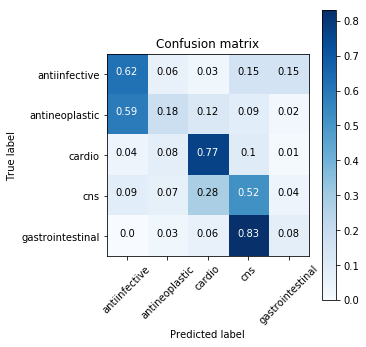

In [15]:
print(v_a5)
print('mean='+str(np.mean(v_a5)))
print('stdev.='+str(np.std(v_a5)))
plt.rcParams['figure.figsize'] = [5, 5]
log_preds,y = learn5.TTA()
probs = np.mean(np.exp(log_preds),0)

preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
adj = cm.transpose()/cm.sum(axis=1)
adj = adj.round(2)
plot_confusion_matrix(adj.transpose(), data5.classes)

### 12 class, pretrained, 10-fold cross validation

In [14]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1
#v12_a = k_fold_cross_loop1(10,1000,5000, label_csv, n)
v_a12, learn12, data12 = k_fold_cross_loop1(10,1000,200, label_csv, n, '_12cls_1000ep_bs200.model')


100%|██████████| 12/12 [00:21<00:00,  1.44s/it]


epoch      trn_loss   val_loss   accuracy                 
    0      2.200873   1.760457   0.425551  
    1      1.892801   1.620592   0.443612                 
    2      1.719065   1.546568   0.474449                 
    3      1.602466   1.504177   0.490308                 
    4      1.526539   1.467308   0.499119                 
    5      1.459959   1.435846   0.502643                 
    6      1.409269   1.415457   0.505727                 
    7      1.365751   1.398402   0.50837                  
    8      1.329007   1.383656   0.514097                 
    9      1.299975   1.362877   0.511013                 
    10     1.266134   1.343159   0.533921                 
    11     1.23079    1.34866    0.517621                 
    12     1.218877   1.337859   0.526872                 
    13     1.199921   1.331852   0.523789                 
    14     1.166849   1.31988    0.530837                 
    15     1.133074   1.322791   0.525551                 
    16     1

   136     0.464261   1.455283   0.557709                  
   137     0.459391   1.476646   0.555066                  
   138     0.459546   1.473016   0.556388                  
   139     0.45726    1.475427   0.556388                  
   140     0.470139   1.478058   0.560793                  
   141     0.466889   1.471024   0.563436                  
   142     0.461887   1.483373   0.554185                  
   143     0.465758   1.482963   0.563877                  
   144     0.464447   1.467857   0.562555                  
   145     0.463543   1.476238   0.556388                  
   146     0.450489   1.46579    0.55859                   
   147     0.447226   1.477296   0.561674                  
   148     0.448593   1.479895   0.559471                  
   149     0.442349   1.469869   0.559031                  
   150     0.441552   1.496735   0.555066                  
   151     0.442823   1.489426   0.555066                  
   152     0.443854   1.49652    0.55638

   272     0.360172   1.605249   0.565639                  
   273     0.350248   1.595953   0.562555                  
   274     0.356929   1.597028   0.562996                  
   275     0.351686   1.595034   0.566079                  
   276     0.357489   1.611868   0.561674                  
   277     0.35971    1.613085   0.562996                  
   278     0.358659   1.614308   0.564317                  
   279     0.35969    1.615903   0.561674                  
   280     0.356663   1.598316   0.565639                  
   281     0.346814   1.59465    0.566079                  
   282     0.351865   1.618315   0.56652                   
   283     0.354635   1.620704   0.561674                  
   284     0.354835   1.610247   0.563877                  
   285     0.358919   1.61404    0.570044                  
   286     0.359881   1.632244   0.565198                  
   287     0.359652   1.624759   0.564317                  
   288     0.361155   1.615026   0.56519

   408     0.321769   1.696485   0.568722                  
   409     0.324051   1.714517   0.564317                  
   410     0.319431   1.710842   0.565198                  
   411     0.318187   1.721501   0.562996                  
   412     0.317541   1.727959   0.563436                  
   413     0.319092   1.725891   0.56652                   
   414     0.31975    1.726522   0.563877                  
   415     0.320719   1.725202   0.565198                  
   416     0.317713   1.721295   0.560352                  
   417     0.313519   1.717161   0.562555                  
   418     0.323438   1.718729   0.566079                  
   419     0.322871   1.71516    0.562115                  
   420     0.316834   1.722724   0.560793                  
   421     0.3173     1.739501   0.568722                  
   422     0.316321   1.735543   0.565639                  
   423     0.31586    1.741659   0.562555                  
   424     0.320832   1.740609   0.56343

   544     0.295631   1.816407   0.569163                  
   545     0.296221   1.816088   0.566079                  
   546     0.298667   1.814384   0.569604                  
   547     0.305059   1.817862   0.570044                  
   548     0.296871   1.820067   0.568282                  
   549     0.300295   1.825229   0.570925                  
   550     0.29741    1.790816   0.567841                  
   551     0.298533   1.802375   0.567841                  
   552     0.297248   1.821951   0.573568                  
   553     0.298719   1.827231   0.563877                  
   554     0.298243   1.798658   0.571806                  
   555     0.295088   1.802036   0.572247                  
   556     0.296902   1.810132   0.568282                  
   557     0.295502   1.813822   0.567401                  
   558     0.295209   1.816961   0.56696                   
   559     0.297896   1.806483   0.572247                  
   560     0.294828   1.816417   0.56607

   680     0.286379   1.857428   0.563877                  
   681     0.285742   1.859303   0.565198                  
   682     0.281031   1.860564   0.570044                  
   683     0.279827   1.887928   0.571806                  
   684     0.277278   1.88715    0.57533                   
   685     0.277312   1.893478   0.569604                  
   686     0.282043   1.875984   0.570925                  
   687     0.281433   1.86972    0.569604                  
   688     0.280451   1.877884   0.568282                  
   689     0.28734    1.882847   0.566079                  
   690     0.282393   1.871697   0.567401                  
   691     0.280797   1.876559   0.56652                   
   692     0.278813   1.87521    0.567841                  
   693     0.278229   1.877704   0.570925                  
   694     0.281992   1.875052   0.566079                  
   695     0.279276   1.876275   0.567841                  
   696     0.282581   1.886528   0.56607

   816     0.274223   1.939369   0.569604                  
   817     0.274675   1.944784   0.569163                  
   818     0.277009   1.956737   0.570044                  
   819     0.280066   1.932942   0.574009                  
   820     0.274454   1.931671   0.565198                  
   821     0.274032   1.91842    0.570925                  
   822     0.2698     1.912557   0.570925                  
   823     0.273927   1.925177   0.568722                  
   824     0.277108   1.912979   0.570044                  
   825     0.271901   1.918925   0.567841                  
   826     0.273701   1.921273   0.568722                  
   827     0.270326   1.940995   0.567401                  
   828     0.271789   1.95641    0.567841                  
   829     0.272233   1.951596   0.570044                  
   830     0.272833   1.947427   0.569163                  
   831     0.270989   1.952171   0.569604                  
   832     0.274374   1.950629   0.57224

   952     0.262009   2.010975   0.570925                  
   953     0.264188   2.003224   0.574009                  
   954     0.268487   1.995171   0.568722                  
   955     0.264503   1.99997    0.567841                  
   956     0.261622   2.005      0.567841                  
   957     0.260396   2.001856   0.568282                  
   958     0.26374    1.998949   0.567841                  
   959     0.261464   1.999191   0.570925                  
   960     0.264681   2.005971   0.569163                  
   961     0.263406   1.985394   0.565639                  
   962     0.261278   1.996317   0.564758                  
   963     0.261704   1.996912   0.565639                  
   964     0.266001   2.013535   0.565198                  
   965     0.268687   2.010707   0.571366                  
   966     0.262228   1.999797   0.564758                  
   967     0.259933   2.021167   0.564317                  
   968     0.264628   2.024727   0.56387

epoch      trn_loss   val_loss   accuracy                 
    0      2.248865   1.807473   0.407048  
    1      1.917161   1.662652   0.446256                 
    2      1.751574   1.599729   0.465198                 
    3      1.641409   1.572427   0.460352                 
    4      1.564455   1.536728   0.484581                 
    5      1.49278    1.507993   0.492511                 
    6      1.442283   1.49644    0.480617                 
    7      1.396143   1.475767   0.507048                 
    8      1.357081   1.466147   0.511454                 
    9      1.339897   1.452276   0.507489                 
    10     1.31271    1.452469   0.511013                 
    11     1.28537    1.440504   0.513656                 
    12     1.25038    1.43113    0.519383                 
    13     1.22666    1.422987   0.51674                  
    14     1.187771   1.402354   0.520264                 
    15     1.177611   1.418563   0.525991                 
    16     1

   136     0.481991   1.668341   0.536564                  
   137     0.489053   1.682313   0.540969                  
   138     0.486974   1.676208   0.536123                  
   139     0.482478   1.681338   0.532159                  
   140     0.479608   1.684311   0.535242                  
   141     0.475405   1.678701   0.534802                  
   142     0.474089   1.688052   0.544934                  
   143     0.473512   1.694923   0.540529                  
   144     0.472127   1.696993   0.537885                  
   145     0.475631   1.690457   0.531718                  
   146     0.475943   1.695011   0.534361                  
   147     0.475038   1.696436   0.534802                  
   148     0.470568   1.687506   0.540969                  
   149     0.472529   1.705491   0.54141                   
   150     0.461643   1.690675   0.535242                  
   151     0.468348   1.704361   0.539207                  
   152     0.462918   1.709597   0.53480

   272     0.38113    1.864745   0.543172                  
   273     0.385247   1.854335   0.540529                  
   274     0.382287   1.859976   0.542731                  
   275     0.379781   1.884503   0.536123                  
   276     0.375392   1.892992   0.534361                  
   277     0.378162   1.877806   0.54141                   
   278     0.375353   1.887717   0.539648                  
   279     0.374905   1.872844   0.544053                  
   280     0.377796   1.868633   0.533921                  
   281     0.373707   1.886864   0.540529                  
   282     0.371518   1.878762   0.537004                  
   283     0.370356   1.872761   0.537445                  
   284     0.369478   1.89772    0.537445                  
   285     0.371891   1.887503   0.53348                   
   286     0.372724   1.884066   0.534802                  
   287     0.366353   1.896467   0.537004                  
   288     0.365211   1.902847   0.53259

   408     0.335423   1.982479   0.543172                  
   409     0.335172   1.996443   0.546256                  
   410     0.332486   2.016922   0.540088                  
   411     0.329439   1.98833    0.540088                  
   412     0.33268    1.99558    0.539207                  
   413     0.33306    2.008586   0.539207                  
   414     0.326215   2.008057   0.542731                  
   415     0.326826   2.017522   0.540088                  
   416     0.324104   2.003251   0.546256                  
   417     0.327258   1.991591   0.544053                  
   418     0.325663   2.015339   0.540969                  
   419     0.330371   1.997979   0.543612                  
   420     0.328419   2.006303   0.542291                  
   421     0.324653   2.020572   0.545374                  
   422     0.332899   2.013146   0.539207                  
   423     0.328318   2.030385   0.544053                  
   424     0.326496   2.016749   0.54096

   544     0.307043   2.105273   0.537885                  
   545     0.30904    2.110949   0.532599                  
   546     0.310654   2.095304   0.540088                  
   547     0.305907   2.098555   0.540969                  
   548     0.302123   2.122203   0.540969                  
   549     0.304556   2.125329   0.539648                  
   550     0.306567   2.107183   0.54185                   
   551     0.30857    2.109379   0.538767                  
   552     0.309958   2.097808   0.543172                  
   553     0.307394   2.106443   0.538767                  
   554     0.31111    2.095139   0.544053                  
   555     0.308997   2.089687   0.544934                  
   556     0.299708   2.122267   0.546696                  
   557     0.305168   2.124351   0.540088                  
   558     0.30415    2.097374   0.543172                  
   559     0.302119   2.100322   0.542291                  
   560     0.299511   2.114757   0.54185

   680     0.288374   2.199236   0.538326                  
   681     0.288151   2.206315   0.539207                  
   682     0.289349   2.216214   0.540088                  
   683     0.291752   2.218103   0.54141                   
   684     0.288879   2.210924   0.537004                  
   685     0.291049   2.182851   0.537445                  
   686     0.295044   2.182969   0.536564                  
   687     0.288704   2.187091   0.536564                  
   688     0.289592   2.211234   0.534361                  
   689     0.287661   2.184797   0.537445                  
   690     0.288439   2.196859   0.537004                  
   691     0.29291    2.215531   0.535683                  
   692     0.290337   2.229258   0.540088                  
   693     0.287341   2.195057   0.540969                  
   694     0.285832   2.214797   0.542731                  
   695     0.289841   2.220224   0.54141                   
   696     0.28829    2.202438   0.53832

   816     0.282846   2.273083   0.539648                  
   817     0.281705   2.268657   0.538326                  
   818     0.279795   2.244418   0.538326                 
   819     0.283139   2.281085   0.540088                  
   820     0.2826     2.285426   0.538326                  
   821     0.294918   2.285255   0.539648                  
   822     0.292351   2.285017   0.539648                  
   823     0.291576   2.285317   0.540529                  
   824     0.289425   2.262909   0.539207                  
   825     0.286707   2.26324    0.537004                  
   826     0.283702   2.273893   0.534361                  
   827     0.287395   2.257786   0.538767                  
   828     0.284676   2.264295   0.538767                  
   829     0.282494   2.258066   0.538767                  
   830     0.283261   2.264618   0.537885                  
   831     0.281276   2.268919   0.540088                  
   832     0.288452   2.250232   0.538326

   952     0.273208   2.352398   0.540969                  
   953     0.276732   2.344205   0.543612                  
   954     0.275265   2.356752   0.546256                  
   955     0.275307   2.334775   0.545815                  
   956     0.270002   2.349539   0.542291                  
   957     0.274482   2.354151   0.542291                  
   958     0.269123   2.377881   0.538326                  
   959     0.273883   2.353143   0.540529                  
   960     0.270802   2.326877   0.538326                  
   961     0.273916   2.34965    0.54141                   
   962     0.273912   2.316627   0.542731                  
   963     0.27336    2.339261   0.537885                  
   964     0.274208   2.34545    0.542291                  
   965     0.268681   2.338585   0.537885                  
   966     0.272382   2.331052   0.537445                  
   967     0.27694    2.367491   0.536564                  
   968     0.272207   2.338512   0.54008

epoch      trn_loss   val_loss   accuracy                 
    0      2.229594   1.806083   0.41674   
    1      1.910607   1.687361   0.447137                 
    2      1.75627    1.619558   0.467401                 
    3      1.644489   1.575711   0.477533                 
    4      1.562543   1.548152   0.486344                 
    5      1.503578   1.530533   0.480176                 
    6      1.458621   1.500143   0.494714                 
    7      1.418148   1.486363   0.505727                 
    8      1.37729    1.487011   0.502203                 
    9      1.330259   1.47221    0.493392                 
    10     1.307785   1.453255   0.5163                   
    11     1.276305   1.437754   0.514097                 
    12     1.257384   1.439512   0.509692                 
    13     1.230749   1.434723   0.520705                 
    14     1.20384    1.418918   0.52511                  
    15     1.186198   1.426351   0.525551                 
    16     1

   136     0.487313   1.69011    0.545374                  
   137     0.488526   1.687005   0.540088                  
   138     0.482031   1.687994   0.539648                  
   139     0.482213   1.71199    0.54185                   
   140     0.486641   1.697447   0.543172                  
   141     0.488364   1.689323   0.540529                  
   142     0.482476   1.711285   0.537885                  
   143     0.482748   1.687425   0.544934                  
   144     0.47318    1.696274   0.542731                  
   145     0.472386   1.708711   0.543612                  
   146     0.475733   1.712158   0.539207                  
   147     0.471244   1.715783   0.542291                  
   148     0.466786   1.701126   0.542731                  
   149     0.467402   1.706752   0.542731                  
   150     0.468276   1.730512   0.547577                  
   151     0.464936   1.714859   0.538326                  
   152     0.458857   1.708837   0.54185

   272     0.374584   1.886471   0.543612                  
   273     0.369676   1.874338   0.540088                  
   274     0.372958   1.890553   0.538767                  
   275     0.371028   1.894876   0.540529                  
   276     0.373472   1.88715    0.537885                  
   277     0.374674   1.895093   0.54185                   
   278     0.372628   1.909806   0.537445                  
   279     0.369538   1.879835   0.540088                  
   280     0.370926   1.892934   0.545815                  
   281     0.372394   1.901568   0.542291                  
   282     0.367842   1.907791   0.545815                  
   283     0.374728   1.916402   0.544934                  
   284     0.373709   1.915196   0.545815                  
   285     0.376197   1.891546   0.544934                  
   286     0.369601   1.916032   0.542291                  
   287     0.36885    1.908481   0.549339                  
   288     0.369048   1.891074   0.54493

   408     0.32982    2.00647    0.542291                  
   409     0.332385   2.000167   0.544493                  
   410     0.339624   2.018956   0.543172                  
   411     0.331363   2.007662   0.544934                  
   412     0.330827   2.00142    0.547137                  
   413     0.32783    2.010607   0.542291                  
   414     0.330236   2.026122   0.543612                  
   415     0.326602   2.02311    0.547137                  
   416     0.327924   2.023639   0.547137                  
   417     0.322178   2.024746   0.544934                  
   418     0.325182   2.01596    0.543612                  
   419     0.319014   2.033299   0.542291                  
   420     0.326108   2.015604   0.544053                  
   421     0.329612   2.04524    0.545815                  
   422     0.327189   2.025841   0.546696                  
   423     0.327788   2.030738   0.547577                  
   424     0.326949   2.052691   0.54801

   544     0.307334   2.112841   0.543612                  
   545     0.305003   2.116566   0.544053                  
   546     0.302223   2.153106   0.538767                  
   547     0.301639   2.144559   0.544053                  
   548     0.30376    2.152047   0.545374                  
   549     0.304966   2.132423   0.54185                   
   550     0.305811   2.149375   0.542291                  
   551     0.305323   2.126566   0.540529                  
   552     0.307348   2.145854   0.540969                  
   553     0.300857   2.15327    0.539207                  
   554     0.305393   2.164148   0.540969                  
   555     0.311517   2.167855   0.544934                  
   556     0.305418   2.147941   0.545815                  
   557     0.304534   2.162537   0.544493                  
   558     0.301952   2.149374   0.548018                  
   559     0.302833   2.149562   0.550661                  
   560     0.302353   2.165416   0.54801

   680     0.289734   2.233413   0.542291                  
   681     0.290839   2.25047    0.543172                  
   682     0.294794   2.258782   0.547577                  
   683     0.294583   2.23854    0.544493                  
   684     0.288399   2.245268   0.542291                  
   685     0.286117   2.245115   0.54141                   
   686     0.291084   2.227346   0.54141                   
   687     0.295459   2.233144   0.544053                  
   688     0.29259    2.212307   0.537445                  
   689     0.298097   2.217123   0.540969                  
   690     0.295078   2.197994   0.54185                   
   691     0.291232   2.200121   0.54141                   
   692     0.293474   2.211541   0.538767                  
   693     0.291954   2.22315    0.539207                  
   694     0.287581   2.24808    0.54141                   
   695     0.286926   2.2155     0.538767                  
   696     0.285091   2.234128   0.53612

   816     0.289977   2.287539   0.539648                  
   817     0.292074   2.295178   0.544934                  
   818     0.293835   2.270482   0.545374                  
   819     0.282142   2.289407   0.547137                  
   820     0.282262   2.287831   0.542291                  
   821     0.275824   2.27361    0.54141                   
   822     0.280652   2.287605   0.540969                  
   823     0.28006    2.29149    0.548018                  
   824     0.281074   2.287779   0.544493                  
   825     0.284485   2.278754   0.54185                   
   826     0.281214   2.281323   0.539207                  
   827     0.285863   2.296188   0.543172                  
   828     0.282815   2.278406   0.544053                  
   829     0.280555   2.271304   0.542731                  
   830     0.276606   2.287644   0.542731                  
   831     0.278746   2.27655    0.544934                  
   832     0.277196   2.307409   0.54713

   952     0.272305   2.361865   0.551542                  
   953     0.272244   2.348697   0.546256                  
   954     0.271561   2.337604   0.545815                  
   955     0.270428   2.356681   0.542731                  
   956     0.274844   2.354967   0.544493                  
   957     0.271644   2.357695   0.545374                  
   958     0.272494   2.361151   0.540529                  
   959     0.277241   2.362207   0.546256                  
   960     0.271303   2.353844   0.548458                  
   961     0.272958   2.349996   0.54978                   
   962     0.274311   2.362634   0.546256                  
   963     0.273866   2.348015   0.54185                   
   964     0.272372   2.371793   0.55022                   
   965     0.270026   2.360507   0.54978                   
   966     0.273832   2.37682    0.551101                  
   967     0.274502   2.375492   0.549339                  
   968     0.273753   2.379586   0.54493

epoch      trn_loss   val_loss   accuracy                 
    0      2.252554   1.7966     0.417621  
    1      1.92212    1.698018   0.438767                 
    2      1.76257    1.643612   0.459912                 
    3      1.658745   1.612745   0.463877                 
    4      1.578493   1.591302   0.479295                 
    5      1.516771   1.579652   0.4837                   
    6      1.467306   1.576486   0.485463                 
    7      1.424866   1.547547   0.489868                 
    8      1.387159   1.540494   0.500881                 
    9      1.365481   1.527573   0.495595                 
    10     1.339795   1.536035   0.494714                 
    11     1.299392   1.519293   0.499119                 
    12     1.266574   1.528783   0.497357                 
    13     1.238337   1.511349   0.492952                 
    14     1.223703   1.523955   0.490749                 
    15     1.203879   1.509474   0.502203                 
    16     1

   136     0.490842   1.916672   0.511013                  
   137     0.486345   1.92726    0.512775                  
   138     0.486275   1.912131   0.514537                  
   139     0.479371   1.90529    0.514537                  
   140     0.484019   1.915833   0.509251                  
   141     0.491374   1.915794   0.512775                  
   142     0.481315   1.944592   0.511454                  
   143     0.479848   1.93825    0.50793                   
   144     0.484657   1.930248   0.509251                  
   145     0.480921   1.934346   0.509692                  
   146     0.481845   1.949596   0.514097                  
   147     0.477816   1.947231   0.507048                  
   148     0.479799   1.932006   0.511013                  
   149     0.490308   1.952151   0.509251                  
   150     0.478035   1.952745   0.508811                  
   151     0.476809   1.939298   0.518062                  
   152     0.469309   1.955671   0.51145

   272     0.38181    2.144595   0.514537                  
   273     0.382565   2.171174   0.509251                  
   274     0.37954    2.148638   0.518943                  
   275     0.376428   2.129107   0.511454                  
   276     0.371185   2.176109   0.517181                  
   277     0.377206   2.162849   0.515418                  
   278     0.3767     2.15608    0.519383                  
   279     0.378384   2.157695   0.520705                  
   280     0.388845   2.169697   0.514978                  
   281     0.379295   2.161923   0.518943                  
   282     0.377617   2.16111    0.5163                    
   283     0.371435   2.161044   0.513216                  
   284     0.378367   2.1569     0.519824                  
   285     0.37661    2.14729    0.523348                  
   286     0.37974    2.156065   0.514978                  
   287     0.375693   2.153293   0.515419                  
   288     0.378441   2.153446   0.51806

   408     0.338779   2.307131   0.514097                  
   409     0.346445   2.287558   0.51674                   
   410     0.354986   2.303543   0.515419                  
   411     0.356278   2.300939   0.51674                   
   412     0.358301   2.288485   0.515859                  
   413     0.348836   2.277554   0.520264                  
   414     0.341673   2.283939   0.522026                  
   415     0.330519   2.267064   0.518062                  
   416     0.329862   2.288985   0.51674                   
   417     0.336446   2.294835   0.5163                    
   418     0.329917   2.285508   0.515859                  
   419     0.334245   2.284456   0.518943                  
   420     0.335952   2.289737   0.5163                    
   421     0.335521   2.281119   0.518502                  
   422     0.335885   2.288178   0.518062                  
   423     0.327339   2.305629   0.514978                  
   424     0.335472   2.293369   0.51541

   544     0.308729   2.395158   0.514537                  
   545     0.314007   2.40154    0.51674                   
   546     0.310134   2.441673   0.513216                  
   547     0.308767   2.398301   0.511894                  
   548     0.309155   2.444722   0.508811                  
   549     0.311782   2.42276    0.511894                  
   550     0.312687   2.431126   0.50837                   
   551     0.31376    2.403467   0.511894                  
   552     0.31454    2.399704   0.509251                  
   553     0.31535    2.418349   0.5163                    
   554     0.31148    2.437127   0.515418                  
   555     0.308383   2.415949   0.511894                  
   556     0.30388    2.430387   0.515859                  
   557     0.310059   2.426178   0.512775                  
   558     0.309945   2.441571   0.515859                  
   559     0.312091   2.431315   0.518943                  
   560     0.316769   2.422869   0.52026

   680     0.296754   2.54484    0.510573                  
   681     0.294268   2.537804   0.512335                  
   682     0.300945   2.516115   0.514097                  
   683     0.295544   2.547169   0.511454                  
   684     0.296079   2.559758   0.515859                  
   685     0.29704    2.530311   0.514978                  
   686     0.296234   2.536796   0.515859                  
   687     0.296177   2.521494   0.515859                  
   688     0.30052    2.534633   0.518502                  
   689     0.295264   2.522393   0.518943                  
   690     0.293432   2.515675   0.513656                  
   691     0.29463    2.527079   0.517181                  
   692     0.296193   2.516025   0.51674                   
   693     0.291601   2.507019   0.519383                  
   694     0.290596   2.515336   0.512775                  
   695     0.299419   2.520067   0.514978                  
   696     0.29404    2.531976   0.51101

   816     0.28821    2.620485   0.519824                  
   817     0.290089   2.638485   0.518062                  
   818     0.289109   2.630725   0.51674                   
   819     0.287178   2.634348   0.519383                  
   820     0.280613   2.648686   0.517621                  
   821     0.276504   2.629451   0.514537                  
   822     0.279128   2.623192   0.518502                  
   823     0.283513   2.640424   0.5163                    
   824     0.285597   2.623897   0.520705                  
   825     0.290057   2.606436   0.515859                  
   826     0.289256   2.62668    0.518062                  
   827     0.283636   2.657656   0.521145                  
   828     0.282757   2.624961   0.519383                  
   829     0.284499   2.62373    0.518943                  
   830     0.285798   2.640984   0.522907                  
   831     0.285938   2.653249   0.520705                  
   832     0.282656   2.629692   0.52114

   952     0.270197   2.675672   0.518502                  
   953     0.272897   2.647992   0.520705                  
   954     0.279362   2.653089   0.518062                  
   955     0.278226   2.677687   0.518062                  
   956     0.278031   2.681074   0.518502                  
   957     0.276639   2.681182   0.517181                  
   958     0.274847   2.71246    0.514978                  
   959     0.275026   2.709245   0.5163                    
   960     0.274321   2.718503   0.520705                  
   961     0.277113   2.709869   0.522026                  
   962     0.275048   2.71741    0.515859                  
   963     0.273714   2.706192   0.51674                   
   964     0.27501    2.693729   0.515418                  
   965     0.278413   2.701699   0.519383                  
   966     0.277784   2.692794   0.520705                  
   967     0.278567   2.704049   0.517181                  
   968     0.273265   2.683561   0.51938

epoch      trn_loss   val_loss   accuracy                 
    0      2.223169   1.792069   0.407489  
    1      1.899624   1.680062   0.446256                 
    2      1.7393     1.635005   0.455947                 
    3      1.638523   1.599603   0.468722                 
    4      1.560302   1.562919   0.479736                 
    5      1.503313   1.556391   0.476211                 
    6      1.454904   1.53164    0.486784                 
    7      1.407341   1.527313   0.481498                 
    8      1.375691   1.508766   0.501762                 
    9      1.33332    1.498232   0.510573                 
    10     1.306315   1.494448   0.513216                 
    11     1.277618   1.473544   0.513216                 
    12     1.254819   1.482171   0.515859                 
    13     1.225396   1.477462   0.504846                 
    14     1.204142   1.463022   0.514537                 
    15     1.179946   1.460934   0.523789                 
    16     1

   136     0.491382   1.771599   0.530396                  
   137     0.479317   1.7899     0.527753                  
   138     0.481835   1.796473   0.528634                  
   139     0.472181   1.794401   0.527313                  
   140     0.465514   1.798573   0.532599                  
   141     0.469175   1.796216   0.528634                  
   142     0.46735    1.806608   0.528194                  
   143     0.458219   1.811963   0.529515                  
   144     0.46349    1.816021   0.530837                  
   145     0.461602   1.795212   0.533921                  
   146     0.461572   1.807089   0.528634                  
   147     0.467989   1.817201   0.532599                  
   148     0.467066   1.804287   0.530837                  
   149     0.465051   1.819092   0.526872                  
   150     0.469283   1.825771   0.532159                  
   151     0.461815   1.820909   0.536564                  
   152     0.464522   1.815778   0.52951

   272     0.366729   1.978863   0.537445                  
   273     0.364209   1.992482   0.537885                  
   274     0.368918   1.991383   0.538326                  
   275     0.371043   1.972519   0.537885                  
   276     0.369121   1.970228   0.540529                  
   277     0.367614   1.969401   0.539207                  
   278     0.370353   1.974248   0.542731                  
   279     0.368908   1.971763   0.540969                  
   280     0.363827   1.988417   0.534802                  
   281     0.366526   1.991852   0.538767                  
   282     0.373672   1.992493   0.542731                  
   283     0.373998   1.981157   0.537445                  
   284     0.365656   2.004804   0.540529                  
   285     0.366169   2.013561   0.540088                  
   286     0.364276   2.014583   0.535242                  
   287     0.371915   2.012926   0.537885                  
   288     0.371366   2.036789   0.53259

   408     0.331044   2.150429   0.530837                  
   409     0.338043   2.144127   0.533921                  
   410     0.335269   2.13064    0.53348                   
   411     0.330809   2.126521   0.532599                  
   412     0.32708    2.125854   0.53304                   
   413     0.324846   2.123989   0.531718                  
   414     0.32602    2.125279   0.532159                  
   415     0.325689   2.129829   0.531278                  
   416     0.325786   2.134681   0.530837                  
   417     0.327051   2.13304    0.530837                  
   418     0.327192   2.146599   0.528634                  
   419     0.324895   2.147206   0.528634                  
   420     0.322688   2.152524   0.529956                  
   421     0.320178   2.142742   0.536123                  
   422     0.322685   2.145176   0.529515                  
   423     0.322604   2.150516   0.534802                  
   424     0.324012   2.151076   0.53392

   544     0.30149    2.245835   0.531718                  
   545     0.308276   2.242892   0.535242                  
   546     0.302865   2.234639   0.529515                  
   547     0.305642   2.236378   0.529075                  
   548     0.303027   2.235722   0.531278                  
   549     0.300904   2.246949   0.533921                  
   550     0.299994   2.242994   0.534361                  
   551     0.304206   2.221293   0.533921                  
   552     0.303559   2.219783   0.532159                  
   553     0.305993   2.235589   0.53348                   
   554     0.30296    2.254238   0.533921                  
   555     0.301871   2.25997    0.536564                  
   556     0.306308   2.249269   0.542731                  
   557     0.302729   2.257957   0.533921                  
   558     0.308598   2.268221   0.53348                   
   559     0.303964   2.265976   0.536123                  
   560     0.301237   2.249942   0.53612

   680     0.28843    2.379928   0.534361                  
   681     0.289374   2.358301   0.534361                  
   682     0.292746   2.352068   0.53348                   
   683     0.289357   2.331362   0.533921                  
   684     0.295379   2.35204    0.531718                  
   685     0.294882   2.354311   0.534361                  
   686     0.293524   2.352794   0.535683                  
   687     0.292162   2.353674   0.536564                  
   688     0.292299   2.341513   0.534361                  
   689     0.295496   2.360211   0.537004                  
   690     0.294545   2.35665    0.539648                  
   691     0.290115   2.359242   0.536564                  
   692     0.289253   2.387444   0.532159                  
   693     0.29105    2.368785   0.532159                  
   694     0.290049   2.376196   0.530837                  
   695     0.289616   2.370513   0.528194                  
   696     0.289278   2.393329   0.53171

   816     0.276547   2.437851   0.538326                  
   817     0.276815   2.453405   0.539648                  
   818     0.282986   2.441184   0.539648                  
   819     0.29197    2.4304     0.54185                   
   820     0.28566    2.399803   0.540088                  
   821     0.279413   2.420021   0.537885                  
   822     0.279745   2.418534   0.536123                  
   823     0.280611   2.436145   0.536564                  
   824     0.282098   2.434388   0.536564                  
   825     0.279793   2.430047   0.533921                  
   826     0.281001   2.425912   0.537885                  
   827     0.280593   2.413285   0.531278                  
   828     0.279035   2.413928   0.537004                  
   829     0.277003   2.427882   0.535242                  
   830     0.279039   2.439614   0.531278                  
   831     0.285668   2.424904   0.531278                  
   832     0.279255   2.415638   0.52907

   952     0.277395   2.501703   0.534802                  
   953     0.277788   2.508075   0.531278                  
   954     0.274086   2.498804   0.532159                  
   955     0.271685   2.508001   0.527313                  
   956     0.269861   2.503151   0.530396                  
   957     0.270368   2.492099   0.532599                  
   958     0.271912   2.490032   0.53348                   
   959     0.268476   2.504663   0.53348                   
   960     0.268729   2.52154    0.534802                  
   961     0.267315   2.52023    0.531278                  
   962     0.270917   2.507624   0.533921                  
   963     0.273464   2.499016   0.536564                  
   964     0.271223   2.508931   0.532159                  
   965     0.270931   2.519361   0.529515                  
   966     0.28348    2.503829   0.53348                   
   967     0.281821   2.513788   0.531718                  
   968     0.27488    2.512033   0.53348

epoch      trn_loss   val_loss   accuracy                 
    0      2.209804   1.808529   0.405286  
    1      1.904422   1.6837     0.446696                 
    2      1.73791    1.618937   0.456828                 
    3      1.629333   1.591583   0.467401                 
    4      1.548866   1.545873   0.490308                 
    5      1.491866   1.538376   0.488106                 
    6      1.442377   1.51371    0.495595                 
    7      1.40258    1.505406   0.495595                 
    8      1.368823   1.472334   0.506608                 
    9      1.330208   1.467582   0.501762                 
    10     1.296273   1.455401   0.513216                 
    11     1.267849   1.454403   0.513656                 
    12     1.251866   1.447633   0.5163                   
    13     1.217702   1.412824   0.518943                  
    14     1.198173   1.435689   0.514978                 
    15     1.178385   1.434843   0.523789                 
    16     

   136     0.478652   1.654637   0.537885                  
   137     0.474875   1.644482   0.54141                   
   138     0.478284   1.663378   0.540088                  
   139     0.474874   1.65649    0.535242                  
   140     0.465135   1.662313   0.543612                  
   141     0.469621   1.660742   0.536564                  
   142     0.471078   1.664829   0.529075                  
   143     0.475653   1.67459    0.534802                  
   144     0.467319   1.67986    0.537885                  
   145     0.466465   1.680744   0.536564                  
   146     0.465539   1.677911   0.540529                  
   147     0.472067   1.674124   0.537004                  
   148     0.470829   1.675739   0.538326                  
   149     0.459859   1.689275   0.537885                  
   150     0.457459   1.690351   0.540969                  
   151     0.468796   1.707599   0.535683                  
   152     0.469319   1.679419   0.54185

   272     0.378458   1.866076   0.542291                  
   273     0.377364   1.875101   0.539207                  
   274     0.375846   1.871522   0.538326                  
   275     0.363957   1.876807   0.538326                  
   276     0.364344   1.872642   0.542291                  
   277     0.370799   1.865797   0.53348                   
   278     0.375737   1.876919   0.536564                  
   279     0.374243   1.861548   0.535683                  
   280     0.368557   1.876716   0.540969                  
   281     0.370105   1.882079   0.536123                  
   282     0.374623   1.879429   0.536123                  
   283     0.371329   1.887997   0.536123                  
   284     0.372339   1.898353   0.536564                  
   285     0.368797   1.873538   0.531278                  
   286     0.368074   1.867787   0.53304                   
   287     0.375724   1.874153   0.535683                  
   288     0.365165   1.868836   0.53524

   408     0.334435   1.968112   0.538767                  
   409     0.328503   1.978688   0.539648                  
   410     0.331986   1.998595   0.54185                   
   411     0.329896   2.000506   0.535683                  
   412     0.336634   1.987364   0.54141                   
   413     0.328544   1.999765   0.542291                  
   414     0.326069   1.975876   0.545374                  
   415     0.323732   1.98774    0.54141                   
   416     0.335416   1.972475   0.537885                  
   417     0.332876   1.992601   0.543172                  
   418     0.330539   1.973123   0.542731                  
   419     0.324305   1.969531   0.540969                  
   420     0.330549   1.97358    0.539207                  
   421     0.326967   1.97532    0.542291                  
   422     0.328106   1.988356   0.544493                  
   423     0.327553   1.982333   0.54185                   
   424     0.326109   1.988088   0.54008

   544     0.303513   2.072995   0.545815                  
   545     0.303843   2.073885   0.545374                  
   546     0.304593   2.068414   0.540529                  
   547     0.302979   2.080538   0.54141                   
   548     0.305134   2.102996   0.539648                  
   549     0.307442   2.096506   0.539207                  
   550     0.306085   2.108122   0.538767                  
   551     0.305602   2.114167   0.544934                  
   552     0.311934   2.105448   0.540529                  
   553     0.311651   2.090917   0.543172                  
   554     0.305078   2.073937   0.545815                  
   555     0.302356   2.075094   0.542731                  
   556     0.300461   2.08075    0.537885                  
   557     0.299895   2.093746   0.543172                  
   558     0.297667   2.112736   0.539648                  
   559     0.302819   2.099884   0.544053                  
   560     0.302531   2.097658   0.53480

   680     0.286493   2.156857   0.535242                  
   681     0.287172   2.189233   0.536564                  
   682     0.291399   2.168967   0.537885                  
   683     0.289563   2.185456   0.535242                  
   684     0.286754   2.193184   0.537004                  
   685     0.286541   2.183497   0.540088                  
   686     0.287339   2.170838   0.537445                  
   687     0.289453   2.173871   0.538326                  
   688     0.290958   2.185645   0.539648                  
   689     0.287582   2.174898   0.537004                  
   690     0.291818   2.179079   0.539648                  
   691     0.290921   2.184654   0.540088                  
   692     0.289594   2.18767    0.540529                  
   693     0.290791   2.187992   0.539648                  
   694     0.285527   2.187834   0.53304                   
   695     0.283055   2.173082   0.538326                  
   696     0.289895   2.187106   0.53964

   816     0.283854   2.252141   0.543172                  
   817     0.275336   2.241626   0.543172                  
   818     0.273247   2.256308   0.54141                   
   819     0.274899   2.273059   0.543172                  
   820     0.277364   2.267595   0.543612                  
   821     0.278361   2.262389   0.54185                   
   822     0.279396   2.25983    0.538326                  
   823     0.281033   2.239356   0.540529                  
   824     0.281821   2.257237   0.54141                   
   825     0.279531   2.247462   0.539207                  
   826     0.27907    2.269395   0.540969                  
   827     0.276367   2.264419   0.538326                  
   828     0.276815   2.246589   0.542731                  
   829     0.274669   2.257336   0.54185                   
   830     0.274999   2.263739   0.535683                  
   831     0.274021   2.25784    0.54141                   
   832     0.275155   2.261353   0.53788

   952     0.268511   2.304727   0.540088                  
   953     0.266714   2.293119   0.539648                  
   954     0.268874   2.318555   0.539648                  
   955     0.271651   2.334677   0.537004                  
   956     0.279661   2.320126   0.54141                   
   957     0.275109   2.307446   0.540088                  
   958     0.269971   2.329348   0.540529                  
   959     0.268227   2.320254   0.54185                   
   960     0.269933   2.340549   0.539648                  
   961     0.27       2.317969   0.540088                  
   962     0.272838   2.334161   0.540088                  
   963     0.269531   2.330792   0.54185                   
   964     0.266876   2.325899   0.543172                  
   965     0.273204   2.322675   0.542731                  
   966     0.27279    2.323814   0.539207                  
   967     0.273153   2.330439   0.540969                  
   968     0.267819   2.325978   0.53876

epoch      trn_loss   val_loss   accuracy                 
    0      2.224819   1.822894   0.415859  
    1      1.900722   1.677338   0.44141                  
    2      1.728314   1.614663   0.463877                 
    3      1.615619   1.585341   0.475771                 
    4      1.54211    1.560737   0.477533                 
    5      1.485854   1.535435   0.488987                  
    6      1.437421   1.524842   0.499119                 
    7      1.395378   1.490592   0.506167                 
    8      1.352137   1.482224   0.500881                 
    9      1.321376   1.476725   0.507489                 
    10     1.286552   1.461231   0.513216                 
    11     1.259989   1.441519   0.513656                 
    12     1.237162   1.445575   0.522907                 
    13     1.21053    1.429689   0.522907                 
    14     1.186821   1.431225   0.51674                  
    15     1.163146   1.429061   0.535242                 
    16     

   136     0.47568    1.697644   0.540529                  
   137     0.472796   1.695897   0.53348                   
   138     0.47934    1.682929   0.544493                  
   139     0.47785    1.701183   0.537445                  
   140     0.477846   1.691438   0.538326                  
   141     0.47741    1.689075   0.544493                  
   142     0.475951   1.703838   0.545815                  
   143     0.470556   1.713483   0.538767                  
   144     0.466166   1.724748   0.540088                  
   145     0.464324   1.702934   0.540088                  
   146     0.459118   1.696255   0.54185                   
   147     0.460906   1.703145   0.543612                  
   148     0.462858   1.714184   0.537885                  
   149     0.461797   1.72107    0.538326                  
   150     0.455681   1.721749   0.540529                  
   151     0.453225   1.717607   0.540969                  
   152     0.450773   1.722397   0.53920

   272     0.368316   1.88646    0.542291                  
   273     0.366579   1.88335    0.543612                  
   274     0.36891    1.881979   0.539648                  
   275     0.370088   1.895995   0.539648                  
   276     0.371375   1.88403    0.538326                  
   277     0.371652   1.895258   0.536123                  
   278     0.374355   1.915621   0.536123                  
   279     0.370458   1.905012   0.537004                  
   280     0.36854    1.909106   0.537004                  
   281     0.37035    1.915165   0.54141                   
   282     0.370559   1.887962   0.539648                  
   283     0.368063   1.904402   0.537445                  
   284     0.371306   1.893291   0.539207                  
   285     0.362667   1.903875   0.538767                  
   286     0.371705   1.896499   0.535242                  
   287     0.370339   1.876967   0.538326                  
   288     0.36506    1.881397   0.53876

   408     0.328093   1.982732   0.545815                  
   409     0.3319     1.986091   0.537445                  
   410     0.330893   1.98968    0.540088                  
   411     0.32617    1.999509   0.54141                   
   412     0.318815   2.001572   0.539648                  
   413     0.32237    2.015948   0.539207                  
   414     0.323518   1.998325   0.53348                   
   415     0.325308   2.011186   0.542291                  
   416     0.325973   2.002726   0.545374                  
   417     0.324944   2.004819   0.540088                  
   418     0.32681    2.011292   0.54185                   
   419     0.329697   2.015169   0.538326                  
   420     0.332015   1.986203   0.54141                   
   421     0.331652   2.008805   0.540969                  
   422     0.331296   2.031227   0.54185                   
   423     0.327502   2.018059   0.538326                  
   424     0.328702   2.02828    0.53744

   544     0.305683   2.097071   0.542731                  
   545     0.304221   2.094737   0.543172                  
   546     0.305934   2.104741   0.540088                  
   547     0.299004   2.115329   0.536123                  
   548     0.298759   2.127397   0.542731                  
   549     0.301643   2.133281   0.542731                  
   550     0.30484    2.124082   0.542731                  
   551     0.311066   2.093505   0.543612                  
   552     0.305844   2.104446   0.54185                   
   553     0.308772   2.109833   0.54141                   
   554     0.300676   2.127418   0.54141                   
   555     0.300804   2.119553   0.539648                  
   556     0.303218   2.119577   0.540088                  
   557     0.297097   2.100581   0.544934                  
   558     0.302982   2.117521   0.546256                  
   559     0.301889   2.096137   0.54185                   
   560     0.301638   2.105323   0.53832

   680     0.290322   2.198788   0.540088                  
   681     0.288609   2.180931   0.544493                  
   682     0.288446   2.195138   0.542291                  
   683     0.288954   2.187557   0.540529                  
   684     0.290078   2.195055   0.544053                  
   685     0.285656   2.184232   0.542291                  
   686     0.293428   2.186653   0.537004                  
   687     0.288169   2.194537   0.542731                  
   688     0.295942   2.184957   0.544053                  
   689     0.301657   2.203672   0.540088                  
   690     0.297582   2.165275   0.544934                  
   691     0.290178   2.179453   0.544934                  
   692     0.289768   2.175589   0.543612                  
   693     0.286778   2.180164   0.54141                   
   694     0.289146   2.193141   0.540529                  
   695     0.288252   2.214985   0.54185                   
   696     0.284798   2.202891   0.54361

   816     0.281752   2.271242   0.538326                  
   817     0.277663   2.268468   0.538767                  
   818     0.275795   2.286022   0.534361                  
   819     0.274948   2.26862    0.540088                  
   820     0.281714   2.28793    0.539648                  
   821     0.277065   2.263201   0.54185                   
   822     0.279103   2.27244    0.540969                  
   823     0.283342   2.274289   0.54141                   
   824     0.295424   2.249727   0.539648                  
   825     0.285753   2.253815   0.538767                  
   826     0.282985   2.281812   0.542291                  
   827     0.279777   2.253797   0.537445                  
   828     0.27987    2.275914   0.540969                  
   829     0.279289   2.269825   0.540088                  
   830     0.275795   2.273816   0.544053                  
   831     0.27189    2.244286   0.542291                  
   832     0.274315   2.258077   0.54052

   952     0.268475   2.338154   0.539648                  
   953     0.269863   2.319124   0.540088                  
   954     0.267377   2.320282   0.544493                  
   955     0.266292   2.30485    0.544493                  
   956     0.268611   2.335522   0.545815                  
   957     0.27016    2.313342   0.545815                  
   958     0.269946   2.33133    0.54141                   
   959     0.271005   2.326169   0.540969                  
   960     0.266654   2.315716   0.540529                  
   961     0.271105   2.31591    0.536123                  
   962     0.269802   2.323143   0.539207                  
   963     0.264676   2.331972   0.539207                  
   964     0.263517   2.320972   0.538767                  
   965     0.26804    2.337801   0.545374                  
   966     0.271136   2.327102   0.54141                   
   967     0.272455   2.312763   0.539207                  
   968     0.269702   2.319899   0.54185

epoch      trn_loss   val_loss   accuracy                 
    0      2.222843   1.7978     0.42511   
    1      1.900877   1.662304   0.452423                 
    2      1.756092   1.630109   0.462555                 
    3      1.646054   1.579311   0.473568                 
    4      1.569832   1.555765   0.4837                   
    5      1.517646   1.532119   0.496035                 
    6      1.465124   1.523072   0.503965                 
    7      1.415901   1.509112   0.500881                 
    8      1.382686   1.498562   0.500441                 
    9      1.343224   1.492527   0.509251                 
    10     1.311629   1.490552   0.515859                 
    11     1.296136   1.46881    0.523348                 
    12     1.269688   1.462688   0.520705                 
    13     1.250257   1.462766   0.523348                 
    14     1.2286     1.461033   0.518062                 
    15     1.203618   1.453329   0.517621                 
    16     1

   136     0.487202   1.770091   0.525551                  
   137     0.490594   1.762494   0.528634                  
   138     0.483661   1.78048    0.531718                  
   139     0.484057   1.777534   0.525551                  
   140     0.486836   1.789411   0.530396                  
   141     0.481971   1.792218   0.534802                  
   142     0.483335   1.793308   0.53304                   
   143     0.486065   1.782152   0.530396                  
   144     0.473265   1.786854   0.520264                  
   145     0.473308   1.812382   0.52511                   
   146     0.474993   1.804008   0.526872                  
   147     0.475332   1.79601    0.532599                  
   148     0.474684   1.781088   0.532159                  
   149     0.466056   1.78324    0.526872                  
   150     0.469037   1.813913   0.530837                  
   151     0.469824   1.829869   0.529956                  
   152     0.469773   1.799629   0.52775

   272     0.376807   2.001047   0.526432                  
   273     0.373407   1.979212   0.529956                  
   274     0.37083    2.006995   0.529956                  
   275     0.376818   2.003696   0.528194                  
   276     0.37955    1.985878   0.522907                  
   277     0.376492   1.987211   0.529956                  
   278     0.377263   1.979906   0.530837                  
   279     0.377751   1.989993   0.527753                  
   280     0.376963   1.974484   0.529956                  
   281     0.378407   1.986817   0.529956                  
   282     0.37343    1.992976   0.532159                  
   283     0.367202   1.97619    0.534802                  
   284     0.3713     2.009854   0.531718                  
   285     0.377426   2.020454   0.526432                  
   286     0.373115   1.999198   0.53304                   
   287     0.370892   1.996626   0.533921                  
   288     0.370328   1.979892   0.53171

   408     0.338641   2.106222   0.523348                  
   409     0.34446    2.112357   0.529956                  
   410     0.343026   2.110092   0.531718                  
   411     0.335504   2.097616   0.529515                  
   412     0.335735   2.112351   0.53304                   
   413     0.337195   2.125808   0.529956                  
   414     0.336144   2.128822   0.526432                  
   415     0.333322   2.139311   0.526872                  
   416     0.336529   2.140969   0.534802                  
   417     0.334725   2.137721   0.532159                  
   418     0.338786   2.119831   0.530396                  
   419     0.337374   2.145001   0.528634                  
   420     0.338613   2.137719   0.527313                  
   421     0.338019   2.132298   0.526872                  
   422     0.338714   2.113261   0.530837                  
   423     0.339688   2.135196   0.529956                  
   424     0.332913   2.129754   0.52819

   544     0.306972   2.232628   0.522907                  
   545     0.309916   2.230794   0.527313                  
   546     0.305975   2.230436   0.526872                  
   547     0.308722   2.21632    0.526872                  
   548     0.312059   2.203596   0.527313                  
   549     0.30782    2.203044   0.526872                  
   550     0.306495   2.195724   0.527753                  
   551     0.306174   2.222142   0.525991                  
   552     0.308638   2.228728   0.525991                  
   553     0.305674   2.237544   0.522467                  
   554     0.307402   2.229666   0.525991                  
   555     0.314633   2.241528   0.529075                  
   556     0.313294   2.211329   0.530837                  
   557     0.306148   2.227934   0.533921                  
   558     0.305892   2.222444   0.531718                  
   559     0.307693   2.217613   0.530837                  
   560     0.303795   2.237272   0.52951

   680     0.296026   2.316445   0.532159                  
   681     0.297123   2.310281   0.528194                  
   682     0.29137    2.336233   0.527753                  
   683     0.295045   2.311832   0.524229                  
   684     0.292668   2.310756   0.532159                  
   685     0.291161   2.317936   0.530837                  
   686     0.289662   2.324909   0.530396                  
   687     0.290681   2.306841   0.528634                  
   688     0.289023   2.327934   0.532599                  
   689     0.293794   2.315977   0.530837                  
   690     0.294362   2.30606    0.529075                  
   691     0.29562    2.344      0.52511                   
   692     0.289784   2.326164   0.528194                  
   693     0.287599   2.324599   0.527753                  
   694     0.289737   2.311051   0.529956                  
   695     0.289635   2.326865   0.532159                  
   696     0.28734    2.323683   0.52599

   816     0.283677   2.413876   0.535683                  
   817     0.279109   2.394306   0.531718                  
   818     0.276872   2.40344    0.530396                  
   819     0.279874   2.386521   0.535683                  
   820     0.28079    2.401955   0.529075                  
   821     0.281483   2.41104    0.532159                  
   822     0.281812   2.423532   0.527753                  
   823     0.279635   2.414787   0.526872                  
   824     0.281914   2.418875   0.531278                  
   825     0.286264   2.409204   0.528194                  
   826     0.285637   2.413792   0.531278                  
   827     0.283471   2.421614   0.527753                  
   828     0.280118   2.408425   0.528634                  
   829     0.277872   2.412731   0.531278                  
   830     0.278732   2.398437   0.529075                  
   831     0.285087   2.402463   0.531278                  
   832     0.280981   2.413882   0.52731

   952     0.274299   2.477098   0.528194                  
   953     0.275005   2.476328   0.527313                  
   954     0.273822   2.473811   0.525551                  
   955     0.272863   2.486872   0.525991                  
   956     0.277654   2.489939   0.521586                  
   957     0.286166   2.501352   0.527313                  
   958     0.277416   2.489158   0.521145                  
   959     0.275813   2.495472   0.52511                   
   960     0.272032   2.495531   0.532159                  
   961     0.275437   2.494374   0.527313                  
   962     0.273426   2.494838   0.530837                  
   963     0.269449   2.495927   0.52511                   
   964     0.269901   2.493278   0.528194                  
   965     0.27544    2.48983    0.525551                  
   966     0.273174   2.482431   0.527313                  
   967     0.274749   2.479794   0.52467                   
   968     0.275342   2.491401   0.52422

epoch      trn_loss   val_loss   accuracy                 
    0      2.232798   1.843866   0.393833  
    1      1.907377   1.730782   0.420264                 
    2      1.7485     1.682098   0.445374                 
    3      1.640182   1.642856   0.457269                 
    4      1.566708   1.623704   0.464758                 
    5      1.504551   1.58992    0.472687                 
    6      1.4488     1.578036   0.478414                 
    7      1.405745   1.580548   0.477533                 
    8      1.372942   1.545733   0.488546                 
    9      1.340849   1.554103   0.485463                 
    10     1.315587   1.534758   0.489427                 
    11     1.274845   1.530822   0.49163                  
    12     1.260805   1.523475   0.503084                 
    13     1.237312   1.516059   0.507489                 
    14     1.206475   1.513281   0.509251                 
    15     1.181741   1.515641   0.490749                 
    16     1

   136     0.486157   1.862037   0.513656                  
   137     0.483448   1.866004   0.517181                  
   138     0.492036   1.866752   0.519383                  
   139     0.486388   1.87315    0.512775                  
   140     0.48447    1.87365    0.5163                    
   141     0.478203   1.880372   0.513656                  
   142     0.477426   1.870737   0.513216                  
   143     0.477155   1.896921   0.515419                  
   144     0.490107   1.903992   0.509692                  
   145     0.492716   1.893789   0.515418                  
   146     0.482256   1.893757   0.512335                  
   147     0.476838   1.914037   0.50793                   
   148     0.469281   1.905053   0.510132                  
   149     0.463257   1.930258   0.511454                  
   150     0.472239   1.917587   0.506167                  
   151     0.474068   1.922512   0.514978                  
   152     0.472626   1.934606   0.51718

   272     0.373813   2.113171   0.51674                   
   273     0.373891   2.114742   0.514537                  
   274     0.380479   2.097973   0.517181                  
   275     0.381042   2.095967   0.518502                  
   276     0.37622    2.124657   0.511894                  
   277     0.373613   2.096244   0.519383                  
   278     0.375319   2.098329   0.517621                  
   279     0.380025   2.11516    0.510573                  
   280     0.374707   2.127615   0.512335                  
   281     0.373359   2.11013    0.512775                  
   282     0.373089   2.129981   0.510573                  
   283     0.375138   2.114122   0.521145                  
   284     0.378589   2.104251   0.515418                  
   285     0.374058   2.119643   0.517621                  
   286     0.368695   2.116948   0.515859                  
   287     0.369209   2.11722    0.518943                  
   288     0.380391   2.10848    0.51938

   408     0.339158   2.220192   0.513656                  
   409     0.339861   2.213947   0.522907                  
   410     0.338975   2.209227   0.518943                  
   411     0.335225   2.216897   0.517621                  
   412     0.330721   2.221354   0.5163                    
   413     0.330228   2.250765   0.514537                  
   414     0.336648   2.23675    0.514097                  
   415     0.3306     2.233429   0.514978                  
   416     0.330257   2.221677   0.511894                  
   417     0.336356   2.239331   0.515859                  
   418     0.33753    2.233681   0.51674                   
   419     0.336777   2.256841   0.522026                  
   420     0.33963    2.236256   0.517621                  
   421     0.325505   2.242754   0.5163                    
   422     0.326779   2.252062   0.515419                  
   423     0.327954   2.260362   0.513656                  
   424     0.331165   2.272221   0.51718

   544     0.312754   2.367454   0.520705                  
   545     0.307194   2.348441   0.522026                  
   546     0.309085   2.365337   0.518502                  
   547     0.307072   2.352657   0.520264                  
   548     0.310191   2.367892   0.519383                  
   549     0.311963   2.371478   0.5163                    
   550     0.304213   2.345428   0.521145                  
   551     0.302049   2.362807   0.520264                  
   552     0.307515   2.358502   0.522907                  
   553     0.307938   2.346394   0.523789                  
   554     0.309403   2.345037   0.525551                  
   555     0.309126   2.359111   0.52511                   
   556     0.309683   2.369143   0.520264                  
   557     0.306908   2.342216   0.520705                  
   558     0.309626   2.36562    0.518943                  
   559     0.307611   2.358563   0.519383                  
   560     0.307395   2.374542   0.51806

   680     0.295494   2.435558   0.518502                  
   681     0.29264    2.438725   0.519383                  
   682     0.299053   2.449711   0.5163                    
   683     0.293371   2.446612   0.5163                    
   684     0.292546   2.469497   0.519383                  
   685     0.291831   2.456848   0.518502                  
   686     0.290279   2.459224   0.517181                  
   687     0.292946   2.446055   0.515859                  
   688     0.291618   2.47031    0.518062                  
   689     0.289161   2.480449   0.515418                  
   690     0.293732   2.476796   0.517181                  
   691     0.293095   2.458266   0.514097                  
   692     0.292411   2.471403   0.5163                    
   693     0.293222   2.464042   0.517181                  
   694     0.294556   2.481834   0.518943                  
   695     0.294172   2.476922   0.517621                  
   696     0.288167   2.477873   0.51850

   816     0.288853   2.60343    0.520705                  
   817     0.288952   2.553172   0.522467                  
   818     0.283278   2.574654   0.520264                  
   819     0.283109   2.583397   0.518502                  
   820     0.283754   2.560658   0.519824                  
   821     0.287248   2.571145   0.52511                   
   822     0.280107   2.550457   0.521586                  
   823     0.278611   2.576898   0.51674                   
   824     0.277399   2.571166   0.515419                  
   825     0.278422   2.566247   0.518062                  
   826     0.283484   2.564117   0.5163                    
   827     0.280467   2.558679   0.518943                  
   828     0.287529   2.568411   0.518502                  
   829     0.285514   2.569059   0.514537                  
   830     0.279986   2.551977   0.520264                  
   831     0.279103   2.56331    0.522467                  
   832     0.278159   2.571647   0.51938

   952     0.276112   2.618204   0.520264                  
   953     0.276894   2.622989   0.519824                  
   954     0.268568   2.602435   0.522026                  
   955     0.273493   2.621551   0.519824                  
   956     0.275599   2.650689   0.519383                  
   957     0.271986   2.633525   0.522467                  
   958     0.27304    2.627088   0.518502                  
   959     0.277341   2.629791   0.515859                  
   960     0.27779    2.622381   0.525551                  
   961     0.275596   2.643342   0.517621                  
   962     0.274903   2.61824    0.521586                  
   963     0.272605   2.616642   0.519383                  
   964     0.271431   2.62311    0.520264                  
   965     0.272894   2.625925   0.519383                  
   966     0.272595   2.639624   0.518943                  
   967     0.274585   2.623163   0.518502                  
   968     0.271833   2.618529   0.52158

epoch      trn_loss   val_loss   accuracy                 
    0      2.238535   1.77385    0.418502  
    1      1.900212   1.641892   0.435683                 
    2      1.732579   1.591499   0.457709                 
    3      1.617065   1.523608   0.4837                   
    4      1.533302   1.498853   0.488987                 
    5      1.467801   1.464753   0.498238                 
    6      1.424991   1.456795   0.497797                 
    7      1.385588   1.439354   0.509251                 
    8      1.341195   1.416951   0.51674                  
    9      1.310262   1.402129   0.514097                 
    10     1.267019   1.396447   0.508811                 
    11     1.244174   1.382251   0.521586                 
    12     1.209705   1.368      0.525551                 
    13     1.198381   1.36685    0.526432                 
    14     1.174908   1.362531   0.524229                 
    15     1.155      1.349575   0.52467                  
    16     1

   136     0.467111   1.537833   0.553744                  
   137     0.47134    1.551436   0.545815                  
   138     0.47034    1.558747   0.555507                  
   139     0.465391   1.548675   0.553304                  
   140     0.463025   1.56665    0.553744                  
   141     0.460125   1.564538   0.544934                  
   142     0.460399   1.562495   0.543612                  
   143     0.462081   1.551689   0.550661                  
   144     0.456622   1.557676   0.555507                  
   145     0.457755   1.559865   0.553744                  
   146     0.452396   1.562494   0.549339                  
   147     0.452905   1.562234   0.556828                  
   148     0.449205   1.592159   0.548018                  
   149     0.456415   1.552706   0.551982                  
   150     0.451989   1.55832    0.549339                  
   151     0.450435   1.554071   0.55022                   
   152     0.451512   1.563095   0.55682

   272     0.361275   1.709      0.557709                  
   273     0.359615   1.73364    0.556828                  
   274     0.368238   1.689017   0.560352                  
   275     0.36983    1.71753    0.559031                  
   276     0.367791   1.705707   0.55815                   
   277     0.366271   1.718836   0.555066                  
   278     0.366164   1.730734   0.556828                  
   279     0.368089   1.73045    0.554626                  
   280     0.366698   1.701463   0.554626                  
   281     0.364238   1.704469   0.556388                  
   282     0.361788   1.723893   0.557709                  
   283     0.363157   1.703046   0.555507                  
   284     0.360804   1.710896   0.551101                  
   285     0.360438   1.719668   0.553304                  
   286     0.358741   1.709793   0.553744                  
   287     0.360489   1.71165    0.553304                  
   288     0.356861   1.71416    0.55550

   408     0.318472   1.811294   0.554185                  
   409     0.316542   1.814198   0.552423                  
   410     0.318885   1.8169     0.553304                  
   411     0.32239    1.810665   0.554185                  
   412     0.328812   1.809089   0.551982                  
   413     0.32427    1.812819   0.551982                  
   414     0.32463    1.804168   0.554185                  
   415     0.321534   1.810209   0.551982                  
   416     0.324238   1.814606   0.553744                  
   417     0.321208   1.819431   0.556828                  
   418     0.32465    1.8198     0.553744                  
   419     0.324355   1.82407    0.55815                   
   420     0.324334   1.810384   0.551982                  
   421     0.321791   1.809643   0.559912                  
   422     0.335677   1.81649    0.556388                  
   423     0.324757   1.819768   0.559471                  
   424     0.321159   1.811395   0.55418

   544     0.301195   1.905289   0.556828                  
   545     0.300634   1.892408   0.560793                  
   546     0.301794   1.904283   0.557709                  
   547     0.304564   1.901929   0.555507                  
   548     0.302416   1.884135   0.554185                  
   549     0.303873   1.914282   0.556828                  
   550     0.302768   1.897169   0.555066                  
   551     0.300341   1.899525   0.551982                  
   552     0.295543   1.887917   0.556828                  
   553     0.29542    1.926265   0.556388                  
   554     0.298233   1.932855   0.553744                  
   555     0.301267   1.922156   0.55815                   
   556     0.301371   1.898262   0.560793                  
   557     0.29826    1.912333   0.557709                  
   558     0.302012   1.907119   0.555947                  
   559     0.29958    1.906702   0.553304                  
   560     0.29521    1.921828   0.55770

   680     0.284482   2.000441   0.557709                  
   681     0.28761    1.990184   0.555507                  
   682     0.283118   2.000211   0.555947                  
   683     0.287876   2.005678   0.556828                  
   684     0.283807   2.016566   0.556828                  
   685     0.28511    2.031245   0.555947                  
   686     0.28841    1.996066   0.559031                  
   687     0.284359   2.005287   0.556828                  
   688     0.285363   2.008519   0.552423                  
   689     0.283538   2.023043   0.551982                  
   690     0.283299   2.00857    0.556828                  
   691     0.285149   1.994892   0.556388                  
   692     0.280189   2.004688   0.559912                  
   693     0.285335   2.000914   0.556828                  
   694     0.285547   2.011436   0.554626                  
   695     0.281421   1.999555   0.555066                  
   696     0.289223   2.022171   0.55374

   816     0.275995   2.082398   0.559912                  
   817     0.272034   2.068679   0.561233                  
   818     0.276354   2.087176   0.557709                  
   819     0.270935   2.073684   0.559912                  
   820     0.270951   2.068716   0.561233                  
   821     0.271033   2.083364   0.555947                  
   822     0.276131   2.075588   0.554626                  
   823     0.275284   2.092818   0.552863                  
   824     0.274772   2.089035   0.559471                  
   825     0.273033   2.075858   0.559031                  
   826     0.273181   2.085801   0.555947                  
   827     0.27788    2.081287   0.554185                  
   828     0.27516    2.091383   0.553304                  
   829     0.273526   2.076634   0.553304                  
   830     0.273352   2.075074   0.559471                  
   831     0.274271   2.087778   0.559471                  
   832     0.276148   2.109173   0.55506

   952     0.266336   2.14996    0.553304                  
   953     0.266412   2.160785   0.550661                  
   954     0.269252   2.15156    0.555507                  
   955     0.275072   2.164721   0.555066                  
   956     0.273222   2.146877   0.553744                  
   957     0.271578   2.125524   0.559031                  
   958     0.268827   2.141387   0.559471                  
   959     0.268681   2.144522   0.557709                  
   960     0.267011   2.144136   0.560793                  
   961     0.267857   2.152675   0.555947                  
   962     0.268308   2.155126   0.555947                  
   963     0.266661   2.147004   0.556828                  
   964     0.263289   2.161473   0.554626                  
   965     0.267733   2.1545     0.560793                  
   966     0.264813   2.154007   0.559031                  
   967     0.266595   2.14821    0.557709                  
   968     0.268253   2.14107    0.55903

[0.5682819338622073, 0.5405286353590205, 0.5444933941448312, 0.5158590250340852, 0.5352422953439704, 0.53524228891087, 0.5378854630539596, 0.5286343536187899, 0.5185022014090668, 0.5537444934708431]
mean=0.5378414084207643
stdev.=0.014786874325232608
[[0.7  0.02 0.13 0.04 0.04 0.01 0.02 0.01 0.   0.   0.   0.  ]
 [0.11 0.46 0.06 0.14 0.1  0.03 0.04 0.02 0.   0.01 0.03 0.  ]
 [0.23 0.03 0.54 0.09 0.05 0.03 0.01 0.01 0.01 0.01 0.   0.  ]
 [0.06 0.02 0.05 0.53 0.16 0.   0.01 0.05 0.01 0.04 0.07 0.01]
 [0.04 0.01 0.04 0.14 0.64 0.   0.06 0.01 0.01 0.   0.03 0.  ]
 [0.14 0.02 0.19 0.09 0.14 0.26 0.12 0.   0.   0.05 0.   0.  ]
 [0.09 0.08 0.06 0.09 0.29 0.02 0.32 0.02 0.02 0.01 0.   0.  ]
 [0.1  0.04 0.16 0.33 0.04 0.   0.   0.3  0.02 0.   0.   0.  ]
 [0.1  0.   0.06 0.1  0.15 0.02 0.06 0.06 0.44 0.   0.   0.  ]
 [0.   0.07 0.13 0.2  0.02 0.   0.   0.02 0.   0.56 0.   0.  ]
 [0.05 0.14 0.03 0.24 0.22 0.01 0.01 0.   0.   0.05 0.23 0.02]
 [0.   0.11 0.   0.33 0.11 0.   0.   0.   0.   0.   0.  

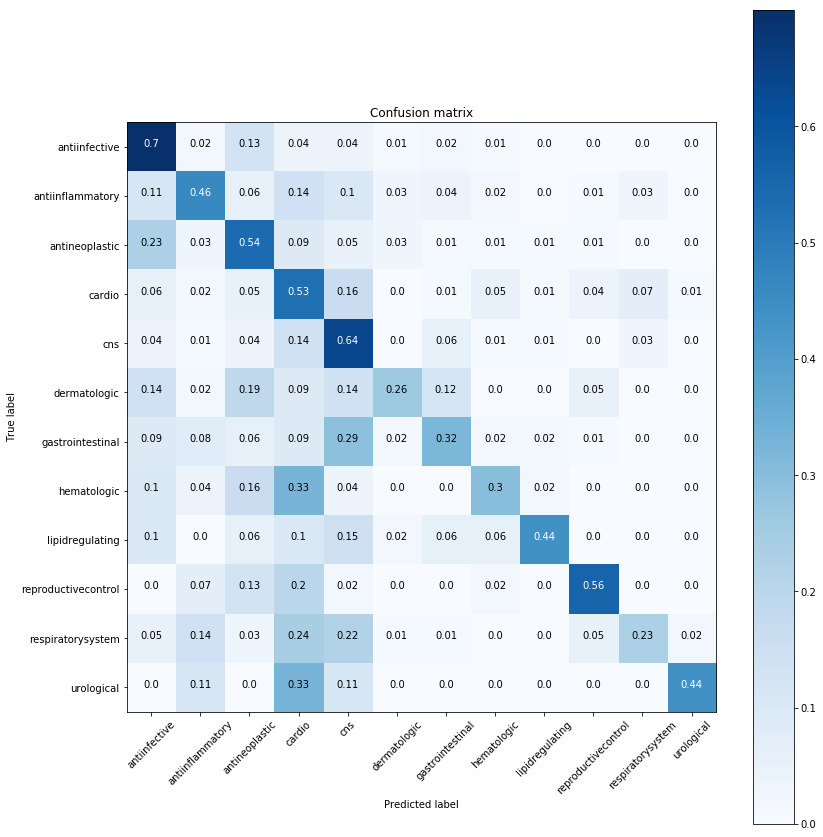

In [19]:
print(v_a12)
print('mean='+str(np.mean(v_a12)))
print('stdev.='+str(np.std(v_a12)))
plt.rcParams['figure.figsize'] = [12, 12]
log_preds,y = learn12.TTA()
probs = np.mean(np.exp(log_preds),0)

preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
adj = cm.transpose()/cm.sum(axis=1)
adj = adj.round(2)
plot_confusion_matrix(adj.transpose(), data12.classes)

### Augment

In [32]:
from sklearn import metrics

In [70]:
def kfoldx_loop2(k, epochs, name, precomp, bs):
    validation_accuracy = []
    for reps in range(k):
        val_idxs = get_cv_idxs(n, seed=random.sample(range(1000), 1)) # random 20% data for validation set
        data = get_data(sz, bs)
        learn = ConvLearner.pretrained(arch, data, precompute=precomp, ps =0.5)
        val_loss, val_acc = learn.fit(1e-2, epochs)
        validation_accuracy.append(val_acc)
        learn.save(str(reps)+name)
    return validation_accuracy, learn

In [ ]:
v_a, learn = kfoldx_loop2(10,200,'_aug_3cls_10fldx.model', False, 200)

epoch      trn_loss   val_loss   accuracy                 
    0      1.175313   0.91654    0.579535  
    1      1.062641   0.880123   0.60186                  
    2      1.002226   0.872993   0.605581                 
    3      0.960023   0.857914   0.620465                  
    4      0.9271     0.841847   0.627907                  
    5      0.909901   0.826804   0.627907                  
    6      0.891133   0.819678   0.636279                  
    7      0.874831   0.818093   0.628837                  
    8      0.859965   0.804972   0.64                      
    9      0.853661   0.798769   0.633488                  
    10     0.834958   0.797326   0.642791                  
    11     0.83243    0.785742   0.652093                  
    12     0.822138   0.788079   0.650233                  
    13     0.818411   0.78963    0.649302                  
    14     0.813005   0.775093   0.646512                  
    15     0.810052   0.773537   0.642791                  

[[0.79 0.09 0.12]                            
 [0.09 0.66 0.25]
 [0.05 0.17 0.77]]


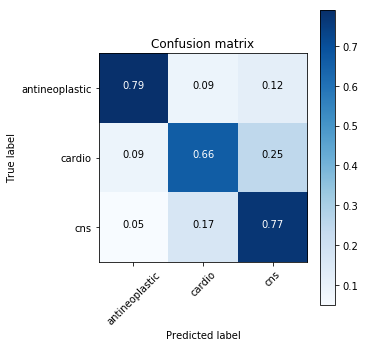

In [66]:
learn.load('1_aug_3cls_10fldx.model')
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
adj = cm.transpose()/cm.sum(axis=1)
adj = adj.round(2)
plot_confusion_matrix(adj.transpose(), data.classes)

[[0.78 0.09 0.13]                            
 [0.1  0.68 0.22]
 [0.05 0.17 0.78]]


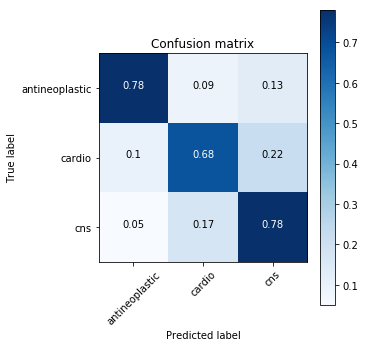

In [67]:
learn.load('9_3cls_10fold.model')
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
adj = cm.transpose()/cm.sum(axis=1)
adj = adj.round(2)
plot_confusion_matrix(adj.transpose(), data.classes)

In [10]:
### compare dropout values - 0, 0.2, 0.4, 0.6, 0.8, train twice each


def kfld_loop3(k, epochs, name, precomp, bs, dropouts):
    #dropoutlist = []
    validation_accuracy = []
    for do in dropouts:
        for reps in range(k):
            val_idxs = get_cv_idxs(n, seed=random.sample(range(1000), 1)) # random 20% data for validation set
            data = get_data(sz, bs)
            print('dropout='+str(do))
            learn = ConvLearner.pretrained(arch, data, precompute=precomp, ps = do)
            val_loss, val_acc = learn.fit(1e-2, epochs)
            validation_accuracy.append(val_acc)
            learn.save(str(reps)+name)
    return validation_accuracy, learn

In [12]:
dropouts = [0, 0.2, 0.4,0.5,0.6,0.8]
#dropouts = [0, 0, 0.2, 0.2]
v_a1, learn1 = kfld_loop3(3, 200, '3cls_preT_dotest_200ep.model', True, 200, dropouts) # precomupte, test dropouts
v_a2, learn2 = kfld_loop3(3, 200, '3cls_preF_dotest_200ep.model', False, 200, dropouts) # no precom, test dropouts
v_a3, learn3 = kfld_loop3(3, 500, '3cls_preT_dotest_500ep.model', True, 200, dropouts) # precomupte, test dropouts
v_a4, learn4 = kfld_loop3(3, 500, '3cls_preF_dotest_500ep.model', False, 200, dropouts) # no precom, test dropouts


dropout=0


epoch      trn_loss   val_loss   accuracy                
    0      0.976561   0.89415    0.593488  
    1      0.808688   0.791851   0.663256                 
    2      0.70985    0.773325   0.670698                 
    3      0.625495   0.739861   0.684651                 
    4      0.556548   0.725481   0.696744                 
    5      0.491422   0.722146   0.706047                 
    6      0.435993   0.699665   0.697674                  
    7      0.383896   0.710502   0.704186                  
    8      0.34035    0.720761   0.72093                  
    9      0.304428   0.714908   0.72186                  
    10     0.277996   0.702172   0.717209                 
    11     0.250573   0.754226   0.712558                  
    12     0.229333   0.763109   0.72186                  
    13     0.21233    0.782533   0.733953                 
    14     0.200056   0.798922   0.712558                  
    15     0.186432   0.843511   0.712558                  
    16  

dropout=0


epoch      trn_loss   val_loss   accuracy                
    0      0.967924   0.886246   0.587907  
    1      0.805155   0.814728   0.63814                  
    2      0.701167   0.751001   0.666047                 
    3      0.6177     0.731335   0.684651                 
    4      0.548655   0.750697   0.702326                 
    5      0.491624   0.782631   0.68                     
    6      0.439223   0.710653   0.713488                 
    7      0.388512   0.722166   0.707907                 
    8      0.34377    0.752126   0.701395                 
    9      0.307103   0.771196   0.708837                  
    10     0.274356   0.790897   0.71814                  
    11     0.247958   0.798353   0.705116                 
    12     0.23029    0.827776   0.693023                 
    13     0.210442   0.816744   0.706977                  
    14     0.196574   0.804717   0.707907                 
    15     0.18765    0.831259   0.709767                 
    16     

dropout=0


epoch      trn_loss   val_loss   accuracy                
    0      0.958261   0.884483   0.592558  
    1      0.805154   0.789172   0.658605                 
    2      0.700371   0.754372   0.686512                 
    3      0.619522   0.782857   0.672558                 
    4      0.543764   0.713626   0.702326                  
    5      0.480376   0.745043   0.686512                 
    6      0.42608    0.738548   0.709767                  
    7      0.376295   0.772442   0.697674                  
    8      0.336189   0.759992   0.716279                 
    9      0.298836   0.756349   0.717209                  
    10     0.268499   0.785536   0.725581                 
    11     0.243611   0.787404   0.710698                 
    12     0.224611   0.811039   0.72                     
    13     0.20897    0.813631   0.709767                 
    14     0.200493   0.815753   0.711628                 
    15     0.190438   0.785035   0.731163                  
    16  

dropout=0.2


epoch      trn_loss   val_loss   accuracy                
    0      1.048344   0.904908   0.589767  
    1      0.903681   0.825887   0.63907                   
    2      0.813236   0.803121   0.644651                  
    3      0.750448   0.760781   0.668837                 
    4      0.69624    0.759492   0.668837                  
    5      0.651102   0.747888   0.670698                  
    6      0.613241   0.722921   0.705116                  
    7      0.582077   0.708255   0.696744                  
    8      0.547954   0.718797   0.714419                 
    9      0.525183   0.706989   0.701395                  
    10     0.496101   0.705474   0.717209                 
    11     0.474321   0.705128   0.715349                 
    12     0.454314   0.709777   0.72186                   
    13     0.43422    0.715614   0.717209                  
    14     0.415985   0.716511   0.715349                 
    15     0.405369   0.696714   0.701395                 
    

dropout=0.2


epoch      trn_loss   val_loss   accuracy                
    0      1.056989   0.899738   0.597209  
    1      0.907198   0.846327   0.631628                 
    2      0.818235   0.788919   0.653023                 
    3      0.75639    0.770096   0.661395                 
    4      0.706775   0.750895   0.664186                 
    5      0.660724   0.734085   0.67907                  
    6      0.620112   0.715348   0.683721                 
    7      0.583918   0.707131   0.691163                 
    8      0.546263   0.714814   0.685581                 
    9      0.515689   0.7016     0.700465                 
    10     0.492439   0.693544   0.713488                 
    11     0.472544   0.727645   0.709767                  
    12     0.451543   0.709795   0.714419                 
    13     0.430217   0.701511   0.705116                 
    14     0.414269   0.707237   0.715349                 
    15     0.393748   0.712855   0.725581                 
    16     0

dropout=0.2


epoch      trn_loss   val_loss   accuracy                
    0      1.034849   0.908525   0.586047  
    1      0.883341   0.839147   0.626047                 
    2      0.799499   0.786893   0.661395                 
    3      0.740358   0.764529   0.675349                 
    4      0.693311   0.750364   0.687442                 
    5      0.647464   0.739792   0.693953                 
    6      0.613199   0.755607   0.668837                 
    7      0.574496   0.727506   0.693953                 
    8      0.550085   0.733572   0.697674                 
    9      0.520468   0.716856   0.705116                 
    10     0.494108   0.705585   0.72093                   
    11     0.472175   0.748433   0.706977                  
    12     0.450416   0.723127   0.701395                  
    13     0.422446   0.726363   0.72186                  
    14     0.408633   0.732113   0.72093                  
    15     0.389086   0.714925   0.723721                 
    16    

dropout=0.4


epoch      trn_loss   val_loss   accuracy                
    0      1.110152   0.921717   0.566512  
    1      0.973497   0.868315   0.610233                
    2      0.900606   0.835363   0.624186                 
    3      0.849173   0.815308   0.632558                 
    4      0.809031   0.793035   0.662326                 
    5      0.781293   0.78314    0.664186                 
    6      0.75578    0.778201   0.655814                 
    7      0.735832   0.775821   0.659535                 
    8      0.718845   0.760639   0.671628                  
    9      0.695298   0.732159   0.694884                  
    10     0.675533   0.742846   0.674419                 
    11     0.65889    0.726868   0.691163                 
    12     0.649705   0.728218   0.686512                 
    13     0.639708   0.7328     0.687442                 
    14     0.625095   0.700923   0.706047                 
    15     0.60682    0.709523   0.695814                 
    16     0

dropout=0.4


epoch      trn_loss   val_loss   accuracy                
    0      1.090505   0.901989   0.590698  
    1      0.96797    0.86654    0.592558                
    2      0.898789   0.82183    0.627907                 
    3      0.850652   0.798394   0.643721                 
    4      0.818542   0.783724   0.643721                 
    5      0.786948   0.774489   0.655814                 
    6      0.763274   0.76977    0.669767                 
    7      0.740497   0.753734   0.666046                 
    8      0.720032   0.759365   0.663256                 
    9      0.701579   0.736537   0.683721                
    10     0.680784   0.721249   0.693953                  
    11     0.663431   0.730511   0.67814                   
    12     0.649687   0.724809   0.686512                  
    13     0.639798   0.707358   0.708837                 
    14     0.623395   0.712856   0.696744                  
    15     0.61412    0.712783   0.703256                  
    16    

dropout=0.4


epoch      trn_loss   val_loss   accuracy                
    0      1.104236   0.905147   0.581395  
    1      0.967796   0.860516   0.613953                
    2      0.894448   0.854143   0.615814                 
    3      0.843534   0.816633   0.632558                 
    4      0.809574   0.79952    0.643721                 
    5      0.781922   0.78324    0.655814                 
    6      0.757489   0.773981   0.665116                 
    7      0.736232   0.762812   0.660465                 
    8      0.712212   0.74923    0.674419                 
    9      0.694229   0.752424   0.661395                  
    10     0.679856   0.756006   0.658605                  
    11     0.665093   0.750009   0.67814                   
    12     0.650106   0.723468   0.688372                  
    13     0.631648   0.721199   0.696744                 
    14     0.622361   0.72517    0.686512                 
    15     0.612506   0.725148   0.689302                  
    16   

dropout=0.5


epoch      trn_loss   val_loss   accuracy                
    0      1.150973   0.940996   0.546977  
    1      1.029926   0.89169    0.591628                
    2      0.951375   0.859552   0.613953                  
    3      0.902696   0.832889   0.634419                  
    4      0.871975   0.831967   0.626047                  
    5      0.84741    0.815171   0.64                     
    6      0.821352   0.809067   0.63814                  
    7      0.803995   0.799234   0.64186                  
    8      0.785718   0.784086   0.653953                 
    9      0.771021   0.779878   0.653023                  
    10     0.760069   0.765784   0.667907                  
    11     0.749198   0.759222   0.666977                  
    12     0.74018    0.763735   0.658605                 
    13     0.731205   0.767211   0.666977                 
    14     0.719402   0.74348    0.67814                  
    15     0.70639    0.745144   0.670698                 
    16  

dropout=0.5


epoch      trn_loss   val_loss   accuracy                
    0      1.134566   0.9243     0.546977  
    1      1.014498   0.900417   0.587907                
    2      0.94848    0.856381   0.613953                  
    3      0.898938   0.838069   0.621395                  
    4      0.866853   0.826871   0.634419                 
    5      0.841578   0.808134   0.637209                  
    6      0.818671   0.798828   0.634419                  
    7      0.797978   0.798409   0.646512                  
    8      0.778042   0.789499   0.64186                   
    9      0.767717   0.788496   0.650233                  
    10     0.756099   0.788157   0.653023                  
    11     0.747188   0.769857   0.662326                  
    12     0.739067   0.768882   0.652093                  
    13     0.72888    0.772992   0.671628                  
    14     0.724571   0.751945   0.673488                 
    15     0.712101   0.746191   0.67814                  
   

dropout=0.5


epoch      trn_loss   val_loss   accuracy                
    0      1.155974   0.945604   0.533953  
    1      1.024836   0.878152   0.59907                 
    2      0.956555   0.877377   0.596279                 
    3      0.910201   0.834623   0.626977                 
    4      0.87582    0.818285   0.634419                  
    5      0.853071   0.811375   0.628837                  
    6      0.829624   0.792894   0.653953                  
    7      0.807661   0.789316   0.648372                  
    8      0.785316   0.79176    0.651163                  
    9      0.77357    0.779938   0.656744                  
    10     0.759302   0.771792   0.665116                  
    11     0.749506   0.775359   0.659535                  
    12     0.738595   0.764827   0.666977                  
    13     0.726282   0.765033   0.656744                  
    14     0.716737   0.762882   0.665116                  
    15     0.712259   0.74219    0.68                      
  

dropout=0.6


epoch      trn_loss   val_loss   accuracy                
    0      1.217676   0.919497   0.573953  
    1      1.073613   0.881669   0.603721                 
    2      1.003161   0.873329   0.6                      
    3      0.956765   0.860598   0.605581                  
    4      0.923977   0.853871   0.615814                  
    5      0.904878   0.841225   0.627907                  
    6      0.889341   0.842788   0.631628                  
    7      0.872626   0.838237   0.618605                  
    8      0.855063   0.820779   0.626047                  
    9      0.84361    0.813244   0.637209                  
    10     0.837585   0.813784   0.63907                  
    11     0.823448   0.811075   0.635349                 
    12     0.817205   0.807151   0.630698                  
    13     0.805955   0.807854   0.63814                   
    14     0.799675   0.811024   0.637209                 
    15     0.79443    0.798917   0.64                     
    

dropout=0.6


epoch      trn_loss   val_loss   accuracy                
    0      1.244904   0.920825   0.573023  
    1      1.086649   0.896591   0.579535                
    2      1.006884   0.872228   0.60093                 
    3      0.953955   0.859146   0.613953                 
    4      0.928569   0.850664   0.613953                  
    5      0.902689   0.844384   0.621395                  
    6      0.884264   0.833391   0.633488                 
    7      0.867217   0.830661   0.628837                 
    8      0.852925   0.828148   0.628837                  
    9      0.844458   0.816923   0.629767                 
    10     0.837401   0.814777   0.64093                  
    11     0.818898   0.814627   0.63814                   
    12     0.815246   0.802977   0.635349                  
    13     0.805124   0.801985   0.63814                  
    14     0.799468   0.797033   0.63814                  
    15     0.792879   0.781989   0.656744                  
    16   

dropout=0.6


epoch      trn_loss   val_loss   accuracy                
    0      1.200081   0.932614   0.547907  
    1      1.066524   0.895047   0.591628                
    2      0.995481   0.886449   0.586977                
    3      0.947606   0.86654    0.610233                
    4      0.920654   0.856385   0.627907                  
    5      0.902324   0.851145   0.613953                  
    6      0.885162   0.841591   0.624186                  
    7      0.869018   0.836678   0.624186                 
    8      0.85637    0.82984    0.619535                  
    9      0.842927   0.818796   0.632558                  
    10     0.832619   0.813939   0.635349                  
    11     0.828694   0.811162   0.64                     
    12     0.825622   0.815147   0.633488                 
    13     0.815965   0.803414   0.64186                  
    14     0.806895   0.798163   0.645581                  
    15     0.8011     0.792366   0.646512                  
    16  

dropout=0.8


epoch      trn_loss   val_loss   accuracy                
    0      1.482401   1.000772   0.498605  
    1      1.260751   0.94413    0.52186                 
    2      1.165166   0.943462   0.526512                
    3      1.105413   0.947865   0.51907                 
    4      1.068895   0.94372    0.545116                 
    5      1.044296   0.935887   0.541395                 
    6      1.027249   0.929692   0.542326                
    7      1.014559   0.925196   0.544186                
    8      1.005219   0.917281   0.533023                
    9      0.99916    0.920296   0.546047                
    10     0.993578   0.927868   0.547907                  
    11     0.984616   0.908704   0.55907                   
    12     0.982931   0.913367   0.546047                  
    13     0.980697   0.914153   0.551628                  
    14     0.979772   0.908605   0.557209                  
    15     0.972605   0.922784   0.549767                  
    16     0.9

dropout=0.8


epoch      trn_loss   val_loss   accuracy                
    0      1.433133   1.017674   0.494884  
    1      1.240191   0.986397   0.504186                
    2      1.145162   0.960639   0.52186                  
    3      1.110524   0.951477   0.524651                 
    4      1.074957   0.946807   0.517209                
    5      1.045149   0.944522   0.52186                 
    6      1.031478   0.932223   0.533023                 
    7      1.020832   0.93812    0.533953                 
    8      1.008343   0.921268   0.556279                
    9      0.994239   0.914407   0.563721                  
    10     0.992079   0.921398   0.541395                  
    11     0.982828   0.917017   0.55907                   
    12     0.979013   0.928719   0.540465                  
    13     0.973977   0.925108   0.553488                 
    14     0.973619   0.909087   0.565581                  
    15     0.969365   0.900769   0.569302                 
    16     0

dropout=0.8


epoch      trn_loss   val_loss   accuracy                
    0      1.491115   1.024013   0.510698  
    1      1.265206   0.970507   0.513488                
    2      1.163285   0.950665   0.51814                 
    3      1.098837   0.938725   0.545116                
    4      1.070419   0.938848   0.532093                 
    5      1.048349   0.938858   0.536744                
    6      1.029549   0.934343   0.538605                 
    7      1.014612   0.928456   0.546977                 
    8      1.002113   0.913182   0.56093                 
    9      0.995491   0.923464   0.546047                  
    10     0.98633    0.93354    0.55814                   
    11     0.980015   0.915812   0.55814                  
    12     0.975119   0.903621   0.56186                   
    13     0.969479   0.911689   0.563721                  
    14     0.967753   0.911953   0.553488                  
    15     0.963333   0.914922   0.565581                  
    16     0

dropout=0


epoch      trn_loss   val_loss   accuracy                 
    0      1.006022   0.876711   0.582326  
    1      0.88284    0.796643   0.631628                  
    2      0.813375   0.768548   0.649302                  
    3      0.753734   0.737399   0.666977                  
    4      0.715231   0.716099   0.673488                  
    5      0.676938   0.702387   0.688372                  
    6      0.643796   0.695684   0.690233                  
    7      0.608759   0.67079    0.702326                  
    8      0.579553   0.668894   0.714419                  
    9      0.554862   0.695301   0.703256                  
    10     0.533957   0.681545   0.712558                  
    11     0.514223   0.684999   0.714419                  
    12     0.495356   0.704271   0.707907                  
    13     0.484206   0.682496   0.722791                  
    14     0.465846   0.685365   0.725581                  
    15     0.452164   0.69557    0.71814                 

dropout=0


epoch      trn_loss   val_loss   accuracy                  
    0      0.995034   0.880999   0.597209  
    1      0.870525   0.806414   0.636279                  
    2      0.801556   0.770646   0.652093                  
    3      0.746669   0.749455   0.661395                  
    4      0.703771   0.744053   0.672558                  
    5      0.662781   0.708417   0.693954                  
    6      0.626158   0.725025   0.686512                  
    7      0.59405    0.7034     0.695814                  
    8      0.567825   0.712137   0.691163                  
    9      0.544895   0.683891   0.707907                  
    10     0.519328   0.730012   0.706977                  
    11     0.500221   0.704677   0.703256                  
    12     0.48125    0.70229    0.703256                  
    13     0.465183   0.72544    0.705116                  
    14     0.454831   0.72579    0.716279                  
    15     0.439924   0.692184   0.707907               

dropout=0


epoch      trn_loss   val_loss   accuracy                 
    0      1.002352   0.922159   0.568372  
    1      0.880987   0.835007   0.617674                  
    2      0.811493   0.761075   0.659535                  
    3      0.751411   0.738704   0.671628                  
    4      0.703734   0.721668   0.685581                  
    5      0.666691   0.710375   0.687442                  
    6      0.640272   0.727133   0.684651                  
    7      0.607853   0.713275   0.685581                  
    8      0.579034   0.694413   0.708837                  
    9      0.555893   0.691838   0.701395                  
    10     0.531884   0.661518   0.717209                  
    11     0.508757   0.676069   0.724651                  
    12     0.490291   0.709585   0.717209                  
    13     0.471972   0.663581   0.727442                  
    14     0.453787   0.643054   0.728372                  
    15     0.437861   0.657142   0.730233                

dropout=0.2


epoch      trn_loss   val_loss   accuracy                 
    0      1.052141   0.905419   0.55814   
    1      0.939536   0.823448   0.624186                  
    2      0.878846   0.791342   0.636279                  
    3      0.837853   0.776496   0.650233                  
    4      0.800931   0.742073   0.675349                  
    5      0.767604   0.718878   0.692093                  
    6      0.742871   0.72506    0.670698                  
    7      0.721993   0.720596   0.67907                   
    8      0.703178   0.701626   0.699535                  
    9      0.686728   0.686438   0.700465                  
    10     0.67123    0.685882   0.706977                  
    11     0.662024   0.70484    0.688372                  
    12     0.641138   0.692864   0.695814                  
    13     0.628677   0.665256   0.703256                  
    14     0.622837   0.668681   0.707907                  
    15     0.608733   0.67056    0.708837                

dropout=0.2


epoch      trn_loss   val_loss   accuracy                 
    0      1.008562   0.870129   0.587907  
    1      0.929562   0.821487   0.618605                  
    2      0.872745   0.787564   0.646512                  
    3      0.830689   0.759103   0.649302                  
    4      0.798146   0.742391   0.655814                  
    5      0.77152    0.72743    0.663256                  
    6      0.746814   0.710966   0.672558                  
    7      0.72542    0.700821   0.68093                   
    8      0.708719   0.703887   0.68                      
    9      0.690447   0.708672   0.68186                   
    10     0.674758   0.694586   0.691163                  
    11     0.663026   0.689157   0.702326                  
    12     0.653878   0.678029   0.693953                  
    13     0.634934   0.671119   0.705116                  
    14     0.623674   0.680898   0.717209                  
    15     0.618412   0.662376   0.726512                

dropout=0.2


epoch      trn_loss   val_loss   accuracy                 
    0      1.0142     0.897321   0.571163  
    1      0.925906   0.835021   0.60186                   
    2      0.869764   0.795613   0.632558                  
    3      0.825625   0.771456   0.646512                  
    4      0.793785   0.74072    0.67814                   
    5      0.770169   0.738188   0.665116                  
    6      0.743196   0.729224   0.672558                  
    7      0.722122   0.725566   0.673488                  
    8      0.704392   0.714932   0.673488                  
    9      0.684066   0.702159   0.691163                  
    10     0.664486   0.690182   0.695814                  
    11     0.651634   0.706751   0.691163                  
    12     0.641415   0.683067   0.704186                  
    13     0.626635   0.674984   0.715349                  
    14     0.615085   0.674812   0.726512                  
    15     0.60674    0.663223   0.72                    

KeyboardInterrupt: 

In [51]:
learn.precompute = False

In [52]:
learn.fit(1e-2, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.675276   0.754112   0.755349  
    1      0.664167   0.735226   0.752558                  
    2      0.653358   0.709646   0.755349                  
    3      0.644328   0.697632   0.750698                  
    4      0.61649    0.680189   0.753488                  



[array([0.68019]), 0.7534883670474207]

In [54]:
learn.save('224_3class_preF_b58')

In [55]:
learn.load('224_3class_preF_b58')

## Find the learning rate

In [58]:
learn.fit.plot_lr()

AttributeError: 'function' object has no attribute 'plot_lr'

In [57]:
learn.sched.plot()

AttributeError: 'CosAnneal' object has no attribute 'plot'

## Increase size

In [81]:
# Starting training on small images for a few epochs, then switching to bigger images, and continuing training is an amazingly effective way to avoid overfitting.

# http://forums.fast.ai/t/planet-classification-challenge/7824/96
# set_data doesn’t change the model at all. It just gives it new data to train with.
learn.set_data(get_data(224, 118)) 
learn.freeze()

#Source:   
#    def set_data(self, data, precompute=False):
#        super().set_data(data)
#        if precompute:
#            self.unfreeze()
#            self.save_fc1()
#            self.freeze()
#            self.precompute = True
#        else:
#            self.freeze()
#File:      ~/fastai/courses/dl1/fastai/conv_learner.py

In [82]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 56, 

In [83]:
learn.fit(5e-3, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.554965   0.620283   0.749767  
    1      0.556964   0.617304   0.752558                  
    2      0.554449   0.615064   0.750698                  


[array([0.61506]), 0.7506976790206377]

epoch      trn_loss   val_loss   accuracy                  
    0      0.711794   62.244102  0.4       


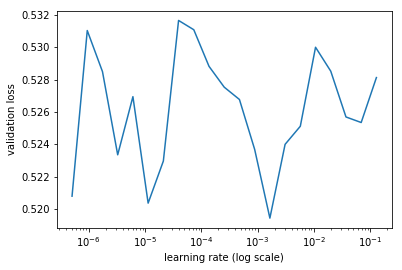

In [84]:
lrf=learn.lr_find(start_lr=1e-9, end_lr=10)
learn.sched.plot()

Validation loss is much lower than training loss. This is a sign of underfitting. Cycle_len=1 may be too short. Let's set cycle_mult=2 to find better parameter.

In [85]:
# When you are under fitting, it means cycle_len=1 is too short (learning rate is getting reset before it had the chance to zoom in properly).
learn.fit(1e-2, 3, cycle_len=1) # 1+2+4 = 7 epochs

epoch      trn_loss   val_loss   accuracy                  
    0      0.53871    0.612978   0.749767  
    1      0.54187    0.614596   0.751628                  
    2      0.535008   0.612283   0.750698                  


[array([0.61228]), 0.7506976659353389]

Training loss and validation loss are getting closer and smaller. We are on right track.

In [37]:
log_preds, y = learn.TTA() # (5, 2044, 120), (2044,)
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.5330396475770925, 1.3259945803139326)

In [64]:
len(data.val_ds.y), data.val_ds.y[:5]

(1075, array([1, 1, 1, 1, 1]))

In [86]:
learn.fit(1e-3, 1, cycle_len=2) # 1+1 = 2 epochs

epoch      trn_loss   val_loss   accuracy                  
    0      0.530726   0.613472   0.753488  
    1      0.526358   0.609563   0.750698                  


[array([0.60956]), 0.7506976724779884]

[[282  27  43]                               
 [ 44 184 120]
 [ 34  24 317]]


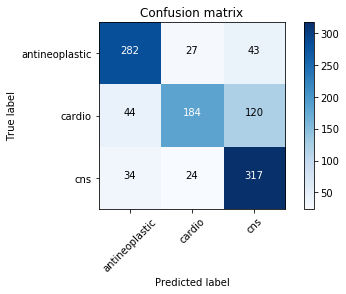

In [68]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

plot_confusion_matrix(cm, data.classes)

In [70]:
learn.save('224_3cls_unf_bs80')

In [71]:
learn.load('224_3cls_unf_bs80')

In [44]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.5259911894273128, 1.3275131736628687)

In [72]:
learn.unfreeze()

In [79]:
lr=np.array([5e-5,5e-4,5e-3])

In [74]:
learn.set_data(get_data(299, 48)) 

 94%|█████████▍| 85/90 [01:06<00:04,  1.21it/s, loss=1.39] 

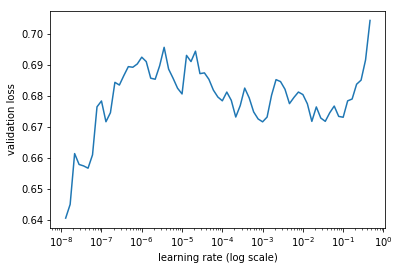

In [78]:
lrf=learn.lr_find(start_lr=1e-9, end_lr=10)
learn.sched.plot()

In [80]:
learn.fit(lr, 3, cycle)

epoch      trn_loss   val_loss   accuracy                  
    0      0.682825   0.67513    0.725581  
    1      0.681779   0.669802   0.724651                  
    2      0.665875   0.668171   0.723721                  
    3      0.675664   0.668802   0.71814                   
    4      0.674737   0.66029    0.731163                  
    5      0.657659   0.658051   0.736744                  
    6      0.63473    0.662198   0.72093                   


[array([0.6622]), 0.7209302371601726]

In [53]:
learn.save('299_3cls_unf_bs48')

In [54]:
learn.load('299_3cls_unf_bs48')

In [ ]:
learn.fit(lr, 10, cycle_len=1, cycle_mult=2)

 27%|██▋       | 51/190 [00:36<01:35,  1.45it/s, loss=1.38]

This dataset is so similar to ImageNet dataset. Training convolution layers doesn't help much. We are not going to unfreeze.

## Create submission

https://youtu.be/9C06ZPF8Uuc?t=1905

In [ ]:
data.classes

In [ ]:
data.test_ds.fnames

In [ ]:
log_preds, y = learn.TTA(is_test=True) # use test dataset rather than validation dataset
probs = np.mean(np.exp(log_preds),0)
#accuracy_np(probs, y), metrcs.log_loss(y, probs) # This does not make sense since test dataset has no labels

In [ ]:
probs.shape # (n_images, n_classes)

In [ ]:
df = pd.DataFrame(probs)
df.columns = data.classes

In [ ]:
df.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])

In [ ]:
df.head()

In [ ]:
SUBM = f'{PATH}/subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)

In [ ]:
FileLink(f'{SUBM}subm.gz')

## Individual prediction

In [ ]:
fn = data.val_ds.fnames[0]
fn

In [ ]:
Image.open(PATH + fn).resize((150, 150))

In [ ]:
# Method 1.
trn_tfms, val_tfms = tfms_from_model(arch, sz)
ds = FilesIndexArrayDataset([fn], np.array([0]), val_tfms, PATH)
dl = DataLoader(ds)
preds = learn.predict_dl(dl)
np.argmax(preds)

In [ ]:
learn.data.classes[np.argmax(preds)]

In [ ]:
# Method 2.
trn_tfms, val_tfms = tfms_from_model(arch, sz)
im = val_tfms(open_image(PATH + fn)) # open_image() returns numpy.ndarray
preds = learn.predict_array(im[None])
np.argmax(preds)